<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Proyecto-Final" data-toc-modified-id="Proyecto-Final-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Proyecto Final</a></span><ul class="toc-item"><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objetivo</a></span></li><li><span><a href="#Implementación-de-Metodología-CRISP-DM" data-toc-modified-id="Implementación-de-Metodología-CRISP-DM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Implementación de Metodología CRISP-DM</a></span><ul class="toc-item"><li><span><a href="#Comprensión-del-Negocio" data-toc-modified-id="Comprensión-del-Negocio-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Comprensión del Negocio</a></span></li><li><span><a href="#Entendimiento-de-los-Datos" data-toc-modified-id="Entendimiento-de-los-Datos-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Entendimiento de los Datos</a></span><ul class="toc-item"><li><span><a href="#Procesamiento-de-los-datos" data-toc-modified-id="Procesamiento-de-los-datos-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Procesamiento de los datos</a></span></li></ul></li><li><span><a href="#Preparación-de-los-Datos" data-toc-modified-id="Preparación-de-los-Datos-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Preparación de los Datos</a></span><ul class="toc-item"><li><span><a href="#Correlación-y-Fusión-de-los-datos" data-toc-modified-id="Correlación-y-Fusión-de-los-datos-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Correlación y Fusión de los datos</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Modelado" data-toc-modified-id="Modelado-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Modelado</a></span><ul class="toc-item"><li><span><a href="#Agrupación-con-KMeans." data-toc-modified-id="Agrupación-con-KMeans.-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>Agrupación con KMeans.</a></span></li><li><span><a href="#Desarrollo-del-Modelo-Predictivo" data-toc-modified-id="Desarrollo-del-Modelo-Predictivo-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Desarrollo del Modelo Predictivo</a></span></li></ul></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Evaluación</a></span></li></ul></li></ul></li></ul></div>

# Proyecto Final

## Objetivo

<div class="alert alert-block alert-success">
    Desarrollar un modelo predictivo para evaluar el riesgo de hipertensión utilizando técnicas
de minería de datos.
</div>

## Implementación de Metodología CRISP-DM

### Comprensión del Negocio

**Descripción del problema y objetivos:**

El objetivo de este proyecto es desarrollar un modelo predictivo en función a DatSets que inluyen mediciones químicas de papcientes, medidas antropomórficas, otros padecimientos como depresión o diabetes y la actividad física de la persona en cuestion, se busca predecir si la persona tiene o no hipertención en base a los parámetros descritos. Se busca implemetar una metodología CRISP-DM para el desarrollo del proyecto. Como objetivo principal se busca la implementación de un modelo predictivo del riesgo de hipertensión, se busca realizar una agrupación de los datos con el método Kmeans para lograr identificar patrones entre las variables, también se busca implementar un método de descenso de gradiente como algoritmo de optimización para el método de regresión logística como modelo predictivo, finalmennte se busca la validación de la calidad del modelo de predicción con diferentes métricas de evaluación.

### Entendimiento de los Datos

#### Procesamiento de los datos

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./Determinaciones_bioquímicas_cronicas_deficiencias_9feb23.csv', delimiter=";")

In [3]:
df1

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,valor_VIT_D,fecdeterm_VIT_D,ponde_v,cuenta_mic,ponde_m12a49,ponde_m0a11,estrato,region,est_sel,upm
0,2022_01001004,2022_01001004_01,13,35,813,815,13:33:14,10/11/2022,13:35:20,10/11/2022,...,,,,0,,,3,4,13,0100100011320
1,2022_01001008,2022_01001008_01,20,44,1244,1244,20:34:12,20/11/2022,20:34:55,20/11/2022,...,,,,0,,,3,4,13,0100100011320
2,2022_01001008,2022_01001008_03,20,43,1243,1243,20:41:51,20/11/2022,20:42:23,20/11/2022,...,,,,0,,,3,4,13,0100100011320
3,2022_01001009,2022_01001009_02,9,26,561,566,09:21:48,10/11/2022,09:26:03,10/11/2022,...,,,"16452,5523392573",0,,,3,4,13,0100100011320
4,2022_01001011,2022_01001011_01,20,49,1249,1249,20:45:31,20/11/2022,20:46:06,20/11/2022,...,,,,0,,,3,4,13,0100100011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13894,2022_32056028,2022_32056028_02,21,24,1284,1284,21:21:45,27/11/2022,21:23:31,27/11/2022,...,,,,0,,,3,4,323,3205600011061
13895,2022_32056028,2022_32056028_03,22,59,1378,1379,22:56:45,27/11/2022,22:58:21,27/11/2022,...,,,,0,,,3,4,323,3205600011061
13896,2022_32056029,2022_32056029_01,9,33,515,573,08:35:37,08/11/2022,09:33:20,08/11/2022,...,,,"23665,7854689048",0,,,3,4,323,3205600011061
13897,2022_32056029,2022_32056029_03,9,38,573,578,09:33:21,08/11/2022,09:38:19,08/11/2022,...,27,12/13/2022,"40075,3929997837",6,"20453,5517262423",,3,4,323,3205600011061


In [4]:
columnasdf1 = ['FOLIO_INT', 'valor_AC_URICO', 'valor_ALBU','valor_COL_HDL','valor_COL_LDL','valor_COLEST','valor_CREAT','valor_GLU_SUERO','valor_INSULINA','valor_PCR','valor_TRIG','valor_EAG','valor_HB1AC','valor_FERRITINA','valor_FOL','valor_HCST','valor_PROTCREAC','valor_STFR_FEB23','valor_VIT_B12','valor_VIT_D','ponde_v','ponde_m12a49']

df1 = df1.filter(columnasdf1)

<div class="alert alert-block alert-success">
    <b>Variables a utilizar del Dataset Determinaciones_bioquímicas_cronicas_deficiencias_9feb23</b>
 
  <ol>
      <li>valor_AC_URICO</li>
      Resultado  Ácido úrico mg/dl
      <li>valor_ALBU</li>
      Resultado  Albúmina g/dL
      <li>valor_COL_HDL</li>
      Resultado  Colesterol HDL mg/dl
      <li>valor_COL_LDL</li>
      Resultado  Colesterol LDL mg/dl
      <li>valor_COLEST</li>
      Resultado  Colesterol total mg/dl
      <li>valor_CREAT</li>
      Resultado  Creatinina mg/dl
      <li>valor_GLU_SUERO</li>
      Resultado  Glucosa mg/dl
      <li>valor_INSULINA</li>
      Resultado  Insulina micro UI/ml
      <li>valor_PCR</li>
      Resultado  Proteína C Reactiva mg/dL
      <li>valor_TRIG</li>
      Resultado  Triglicéridos mg/dl
      <li>valor_EAG</li>
      Resultado Glucosa Promedio Estimada mg/dL
      <li>valor_HB1AC</li>
      Resultado  Hemoglobina glucosilada. %
      <li>valor_FERRITINA</li>
      Resultado Ferritina ng/mL
      <li>valor_FOL</li>
      Resultado Folato ng/mL
      <li>valor_HCST</li>
      Resultado Homocisteina micromol/L
      <li>valor_PROTCREAC</li>
      Resultado  Proteína C Reactiva mg/L
      <li>valor_STFR_FEB23</li>
      Resultado Receptor de Transferrina mg/L
      <li>valor_VIT_B12</li>
      Resultado Vitamina B12 pg/mL
      <li>valor_VIT_D</li>
      Resultado Vitamina D ng/mL
      <li>ponde_v</li>
      ponderador venosa 20+
      <li>ponde_m12a49</li>
      ponderador micro-nutrientes
  </ol>
    
</div>

In [5]:
df1

,FOLIO_INT,valor_AC_URICO,valor_ALBU,valor_COL_HDL,valor_COL_LDL,valor_COLEST,valor_CREAT,valor_GLU_SUERO,valor_INSULINA,valor_PCR,...,valor_HB1AC,valor_FERRITINA,valor_FOL,valor_HCST,valor_PROTCREAC,valor_STFR_FEB23,valor_VIT_B12,valor_VIT_D,ponde_v,ponde_m12a49
0,2022_01001004_01,,,,,,,,,,...,,,,,,,,,,
1,2022_01001008_01,,,,,,,,,,...,,,,,,,,,,
2,2022_01001008_03,,,,,,,,,,...,,,,,,,,,,
3,2022_01001009_02,"4,4","3,8",73,130,252,",62",111,"9,4",",29",...,"6,2",,,,,,,,"16452,5523392573",
4,2022_01001011_01,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13894,2022_32056028_02,,,,,,,,,,...,,,,,,,,,,
13895,2022_32056028_03,,,,,,,,,,...,,,,,,,,,,
13896,2022_32056029_01,"5,5",4,44,96,171,",8",89,"6,1",",25",...,"5,3",,,,,,,,"23665,7854689048",
13897,2022_32056029_03,"2,5","2,4",31,46,90,",4",58,"3,3",",02",...,"5,1","6,3","10,1","7,53",",02",1,104,27,"40075,3929997837","20453,5517262423"


In [6]:
columnas_numericas = ['valor_AC_URICO', 'valor_ALBU','valor_COL_HDL','valor_COL_LDL','valor_COLEST','valor_CREAT','valor_GLU_SUERO','valor_INSULINA','valor_PCR','valor_TRIG','valor_EAG','valor_HB1AC','valor_FERRITINA','valor_FOL','valor_HCST','valor_PROTCREAC','valor_STFR_FEB23','valor_VIT_B12','valor_VIT_D','ponde_v','ponde_m12a49']
df1[columnas_numericas] = df1[columnas_numericas].replace({',': '.', ' ': np.nan}, regex=True)
df1 = df1.replace(r'^\s*$', np.nan, regex=True)

In [7]:
df1

,FOLIO_INT,valor_AC_URICO,valor_ALBU,valor_COL_HDL,valor_COL_LDL,valor_COLEST,valor_CREAT,valor_GLU_SUERO,valor_INSULINA,valor_PCR,...,valor_HB1AC,valor_FERRITINA,valor_FOL,valor_HCST,valor_PROTCREAC,valor_STFR_FEB23,valor_VIT_B12,valor_VIT_D,ponde_v,ponde_m12a49
0,2022_01001004_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022_01001008_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022_01001008_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022_01001009_02,4.4,3.8,73,130,252,.62,111,9.4,.29,...,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16452.5523392573,NaN
4,2022_01001011_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13894,2022_32056028_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13895,2022_32056028_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13896,2022_32056029_01,5.5,4,44,96,171,.8,89,6.1,.25,...,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23665.7854689048,NaN
13897,2022_32056029_03,2.5,2.4,31,46,90,.4,58,3.3,.02,...,5.1,6.3,10.1,7.53,.02,1,104,27,40075.3929997837,20453.5517262423


In [8]:
df1.isna().sum()

FOLIO_INT               0
valor_AC_URICO      11808
valor_ALBU          11808
valor_COL_HDL       11808
valor_COL_LDL       11808
valor_COLEST        11808
valor_CREAT         11808
valor_GLU_SUERO     11808
valor_INSULINA      11808
valor_PCR           11808
valor_TRIG          11808
valor_EAG           11836
valor_HB1AC         11836
valor_FERRITINA     11636
valor_FOL           11638
valor_HCST          11622
valor_PROTCREAC     11632
valor_STFR_FEB23    11826
valor_VIT_B12       11638
valor_VIT_D         11622
ponde_v             11800
ponde_m12a49        12709
dtype: int64

In [9]:
df2 = pd.read_csv('./ensaantro2022_entrega_w.csv', delimiter=";")

In [10]:
df2

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,comentario,tiempo,hora_fin,fecha_fin,completa,otroent,ponde_f,estrato,est_sel,upm
0,2022_01001001,2022_01001001_01,20,31,1228,1231,20:28:39,09/11/2022,20:31:33,09/11/2022,...,,3,20:31:33,09/11/2022,1,,"999,761285509631",3,13,0100100011320
1,2022_01001001,2022_01001001_02,20,28,1226,1228,20:26:30,09/11/2022,20:28:37,09/11/2022,...,,2,20:28:37,09/11/2022,1,,"1546,78591945017",3,13,0100100011320
2,2022_01001003,2022_01001003_02,20,36,1231,1236,20:31:35,09/11/2022,20:36:37,09/11/2022,...,,5,20:36:37,09/11/2022,1,,"2926,13359214152",3,13,0100100011320
3,2022_01001003,2022_01001003_03,19,29,1080,1169,18:00:46,10/11/2022,19:29:56,10/11/2022,...,"ta correcta de la 3° es de 89/43 , se coloca 8...",89,19:29:56,10/11/2022,1,,"1819,85902017304",3,13,0100100011320
4,2022_01001003,2022_01001003_06,20,37,1236,1237,20:36:38,09/11/2022,20:37:59,09/11/2022,...,,1,20:37:59,09/11/2022,1,,"4640,3577583505",3,13,0100100011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15068,2022_32056026,2022_32056026_02,13,38,814,818,13:34:24,07/11/2022,13:38:38,07/11/2022,...,,4,13:38:38,07/11/2022,1,,"3556,94526802604",3,323,3205600011061
15069,2022_32056027,2022_32056027_01,18,27,1099,1107,18:19:24,06/11/2022,18:27:03,06/11/2022,...,,8,18:27:03,06/11/2022,1,,"5205,29109550101",3,323,3205600011061
15070,2022_32056029,2022_32056029_01,13,43,818,823,13:38:40,07/11/2022,13:43:12,07/11/2022,...,,5,13:43:12,07/11/2022,1,,"5205,29109550101",3,323,3205600011061
15071,2022_32056029,2022_32056029_03,13,46,823,826,13:43:13,07/11/2022,13:46:23,07/11/2022,...,,3,13:46:23,07/11/2022,1,,"6474,68453129719",3,323,3205600011061


In [11]:
columnasdf2 = ['FOLIO_INT','an01_1','an04_1','an08_1','an17_1','an19','an23','an25','an27_01s','an27_01d','an27_02s','an27_02d','an27_03s','an27_03d','ponde_f']

df2 = df2.filter(columnasdf2)

<div class="alert alert-block alert-success">
    <b>Variables a utilizar del Dataset ensaantro2022_entrega_w</b>
 
  <ol>
      <li>an01_1</li>
      PESO
      <li>an04_1</li>
      ESTATURA
      <li>an08_1</li>
      CINTURA
      <li>an17_1</li>
      DISTANCIA QUE HAY ENTRE LA RODILLA Y EL TALÓN
      <li>an19</li>
      CIRCUNFERENCIA DE LA PANTORILLA
      <li>an23</li>
      DISTANCIA DEL PECHO HACIA LA PUNTA DEL DEDO MEDIO
      <li>an25</li>
      CIRCUNFERENCIA MEDIA DEL BRAZO
      <li>an27_01s</li>
      TENSIÓN ARTERIAL SISTOLICA
      <li>an27_01d</li>
      TENSIÓN ARTERIAL DIASTOLICA
      <li>an27_02s</li>
      TENSIÓN ARTERIAL SISTOLICA
      <li>an27_02d</li>
      TENSIÓN ARTERIAL DIASTOLICA
      <li>an27_03s</li>
      TENSIÓN ARTERIAL SISTOLICA
      <li>an27_03d</li>
      TENSIÓN ARTERIAL DIASTOLICA
      <li>ponde_f</li>
      Ponderador
  </ol>
    
</div>

In [12]:
df2

,FOLIO_INT,an01_1,an04_1,an08_1,an17_1,an19,an23,an25,an27_01s,an27_01d,an27_02s,an27_02d,an27_03s,an27_03d,ponde_f
0,2022_01001001_01,"69,3","141,6","110,1",,,,,115,85,119,80,124,78,"999,761285509631"
1,2022_01001001_02,"44,6","151,5",,,,,,,,,,,,"1546,78591945017"
2,2022_01001003_02,,,,"49,1","38,1",,,130,78,123,74,123,76,"2926,13359214152"
3,2022_01001003_03,"110,35","156,8","132,1",,,,,87,50,93,58,89,49,"1819,85902017304"
4,2022_01001003_06,"33,5","151,8",,,,,,,,,,,,"4640,3577583505"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15068,2022_32056026_02,,,,"47,2",38,,,147,87,143,85,144,81,"3556,94526802604"
15069,2022_32056027_01,,,,"53,2",42,,,112,63,110,61,110,61,"5205,29109550101"
15070,2022_32056029_01,,,,"51,5","36,5",,,108,59,97,50,100,59,"5205,29109550101"
15071,2022_32056029_03,"41,6",146,"67,2",,,,,81,52,89,50,88,55,"6474,68453129719"


In [13]:
columnas_numericas = ['an01_1','an04_1','an08_1','an17_1','an19','an23','an25','an27_01s','an27_01d','an27_02s','an27_02d','an27_03s','an27_03d','ponde_f']
df2[columnas_numericas] = df2[columnas_numericas].replace({',': '.', ' ': np.nan}, regex=True)
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [14]:
df2.rename(columns={'ponde_f': 'ponde_a'}, inplace=True)

In [15]:
df2

,FOLIO_INT,an01_1,an04_1,an08_1,an17_1,an19,an23,an25,an27_01s,an27_01d,an27_02s,an27_02d,an27_03s,an27_03d,ponde_a
0,2022_01001001_01,69.3,141.6,110.1,NaN,NaN,NaN,NaN,115,85,119,80,124,78,999.761285509631
1,2022_01001001_02,44.6,151.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1546.78591945017
2,2022_01001003_02,NaN,NaN,NaN,49.1,38.1,NaN,NaN,130,78,123,74,123,76,2926.13359214152
3,2022_01001003_03,110.35,156.8,132.1,NaN,NaN,NaN,NaN,87,50,93,58,89,49,1819.85902017304
4,2022_01001003_06,33.5,151.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4640.3577583505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15068,2022_32056026_02,NaN,NaN,NaN,47.2,38,NaN,NaN,147,87,143,85,144,81,3556.94526802604
15069,2022_32056027_01,NaN,NaN,NaN,53.2,42,NaN,NaN,112,63,110,61,110,61,5205.29109550101
15070,2022_32056029_01,NaN,NaN,NaN,51.5,36.5,NaN,NaN,108,59,97,50,100,59,5205.29109550101
15071,2022_32056029_03,41.6,146,67.2,NaN,NaN,NaN,NaN,81,52,89,50,88,55,6474.68453129719


In [16]:
df2.isna().sum()

FOLIO_INT        0
an01_1        2316
an04_1        2316
an08_1        8827
an17_1       12777
an19         12777
an23         14960
an25         14960
an27_01s      6239
an27_01d      6298
an27_02s      6298
an27_02d      6298
an27_03s      6298
an27_03d      6298
ponde_a          0
dtype: int64

In [17]:
df3 = pd.read_csv('./ensafisica2022_adultos_entrega_w.csv', delimiter=";")

/var/folders/hh/g6fqg94s6x9frs4dt49gl1rr0000gn/T/ipykernel_31443/2233300148.py:1: DtypeWarning: Columns (90,91,96,97,102,103,104,107,108,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('./ensafisica2022_adultos_entrega_w.csv', delimiter=";")


In [18]:
df3

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,comentario,tiempo,hora_fin,fecha_fin,completa,otroent,ponde_f,estrato,est_sel,upm
0,2022_19039077,2022_19039077_02,20,30,838,1230,13:58:06,06/09/2022,20:30:25,06/09/2022,...,,392,20:30:25,06/09/2022,1,,"6655,01840464672",3,193,1903900010457
1,2022_31052002,2022_31052002_01,10,49,636,649,10:36:36,01/11/2022,10:49:35,01/11/2022,...,,13,10:49:35,01/11/2022,1,,"6043,3569276438",1,311,3105200000110
2,2022_25015043,2022_25015043_03,11,25,684,685,19:15:50,18/11/2022,19:18:39,18/11/2022,...,,4,11:25:12,19/11/2022,1,,"8382,07611211724",1,251,2501500000662
3,2022_27002061,2022_27002061_01,14,5,838,845,13:58:44,17/10/2022,14:05:40,17/10/2022,...,ninguno,7,14:05:40,17/10/2022,1,,"2107,37649162272",1,271,2700200000502
4,2022_19006050,2022_19006050_01,10,39,632,639,10:32:44,24/09/2022,10:39:48,24/09/2022,...,tiene parkinson y solo esta en su hogar,7,10:39:48,24/09/2022,1,,"9825,36778961644",3,193,1900600010920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,2022_32052010,2022_32052010_05,14,55,891,895,14:51:18,14/11/2022,14:55:24,14/11/2022,...,Ninguno,4,14:55:24,14/11/2022,1,,"971,809235414811",1,321,3205200000026
8236,2022_32052028,2022_32052028_06,16,55,1011,1015,16:51:37,15/11/2022,16:55:42,15/11/2022,...,ninguno,4,16:55:42,15/11/2022,1,,"2012,73533816062",1,321,3205200000026
8237,2022_32052044,2022_32052044_03,17,10,1028,1030,17:08:45,14/11/2022,17:10:31,14/11/2022,...,no,2,17:10:31,14/11/2022,1,,"2120,70443984877",1,321,3205200000026
8238,2022_32053032,2022_32053032_03,18,15,1091,1095,18:11:58,19/11/2022,18:15:17,19/11/2022,...,no,4,18:15:17,19/11/2022,1,,"3549,25150759428",2,322,3205300010343


In [19]:
columnasdf3 = ['FOLIO_INT','fd0503','fa0400','fa0401','fa0402ah','fa0403','fa0404ah','fa0405','fa0406ah','fa0406bh','fa0407h','fa0410','fa0414','ponde_f']

df3 = df3.filter(columnasdf3)

<div class="alert alert-block alert-success">
    <b>Variables a utilizar del Dataset ensafisica2022_adultos_entrega_w</b>
 
  <ol>
      <li>fd0503</li>
      ¿Cuántos días estuviste activo durante al menos 60 minutos por día?
      <li>fa0400</li>
      ¿Cuántas HORAS en promedio duerme en un día?
      <li>fa0401</li>
      ¿Cuántos DÍAS realizó usted alguna actividad que requiera de un esfuerzo físico vigoroso?
      <li>fa0402ah</li>
      ¿Cuánto TIEMPO en total le tomó realizar actividad(es) física(s) vigorosa(s) en UNO de esos días? HORAS
      <li>fa0403</li>
      ¿Cuántos DÍAS realizó usted alguna actividad física moderada?
      <li>fa0404ah</li>
      ¿Cuánto TIEMPO en total le tomó realizar actividad(es) física(s) moderada(s) en UNO de esos días? HORAS
      <li>fa0405</li>
      ¿Cuántos DÍAS usted caminó por lo menos 10 minutos continuos?
      <li>fa0406ah</li>
      ¿Cuánto TIEMPO caminó usted en UNO de esos días? HORAS
      <li>fa0406bh</li>
       ¿Cuál es la cantidad total de TIEMPO que usted caminó en los últimos 7 días? HORAS
      <li>fa0407h</li>
      ¿Cuánto TIEMPO en total estuvo sentado(a) en UNO de esos días de la semana? HORAS
      <li>fa0410</li>
      ¿Cuántas horas de lunes a viernes pasa frente a una pantalla, viendo televisión (incluyendo películas o DVD). Incluya tiempo de la mañana, tarde y noche.
      <li>fa0414</li>
      ¿Cuántas horas de lunes a viernes pasa frente a una computadora, tableta electrónica o teléfono, ya sea chateando, navegando en internet, enviando mails o trabajando (sin contar jugar en la computadora, tableta electrónF50
      <li>ponde_f</li>
      Ponderador
  </ol>
    
</div>

In [20]:
df3

,FOLIO_INT,fd0503,fa0400,fa0401,fa0402ah,fa0403,fa0404ah,fa0405,fa0406ah,fa0406bh,fa0407h,fa0410,fa0414,ponde_f
0,2022_19039077_02,,3,0,,0,,7,2,,3,3,0,"6655,01840464672"
1,2022_31052002_01,,3,0,,7,5,7,5,,1,0,0,"6043,3569276438"
2,2022_25015043_03,,3,0,,2,1,7,0,,1,2,2,"8382,07611211724"
3,2022_27002061_01,,1,0,,0,,0,,,1,0,0,"2107,37649162272"
4,2022_19006050_01,,5,0,,0,,0,,,10,6,2,"9825,36778961644"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,2022_32052010_05,,4,4,3,5,6,7,0,,4,0,5,"971,809235414811"
8236,2022_32052028_06,,3,2,3,2,1,7,0,,1,2,4,"2012,73533816062"
8237,2022_32052044_03,,4,2,2,6,1,0,,,3,1,4,"2120,70443984877"
8238,2022_32053032_03,,2,3,3,4,1,5,0,,3,2,5,"3549,25150759428"


In [21]:
columnas_numericas = ['FOLIO_INT','fd0503','fa0400','fa0401','fa0402ah','fa0403','fa0404ah','fa0405','fa0406ah','fa0406bh','fa0407h','fa0410','fa0414','ponde_f']
df3[columnas_numericas] = df3[columnas_numericas].replace({',': '.', ' ': np.nan}, regex=True)
df3 = df3.replace(r'^\s*$', np.nan, regex=True)

In [22]:
df3

,FOLIO_INT,fd0503,fa0400,fa0401,fa0402ah,fa0403,fa0404ah,fa0405,fa0406ah,fa0406bh,fa0407h,fa0410,fa0414,ponde_f
0,2022_19039077_02,NaN,3,0,NaN,0,NaN,7,2,NaN,3,3,0,6655.01840464672
1,2022_31052002_01,NaN,3,0,NaN,7,5,7,5,NaN,1,0,0,6043.3569276438
2,2022_25015043_03,NaN,3,0,NaN,2,1,7,0,NaN,1,2,2,8382.07611211724
3,2022_27002061_01,NaN,1,0,NaN,0,NaN,0,NaN,NaN,1,0,0,2107.37649162272
4,2022_19006050_01,NaN,5,0,NaN,0,NaN,0,NaN,NaN,10,6,2,9825.36778961644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,2022_32052010_05,NaN,4,4,3,5,6,7,0,NaN,4,0,5,971.809235414811
8236,2022_32052028_06,NaN,3,2,3,2,1,7,0,NaN,1,2,4,2012.73533816062
8237,2022_32052044_03,NaN,4,2,2,6,1,0,NaN,NaN,3,1,4,2120.70443984877
8238,2022_32053032_03,NaN,2,3,3,4,1,5,0,NaN,3,2,5,3549.25150759428


In [23]:
df3.isna().sum()

FOLIO_INT       0
fd0503       8240
fa0400          0
fa0401          0
fa0402ah     5455
fa0403         18
fa0404ah     2722
fa0405         18
fa0406ah     1358
fa0406bh     8200
fa0407h        18
fa0410         18
fa0414         18
ponde_f         0
dtype: int64

In [24]:
df4 = pd.read_csv('./ensadul2022_entrega_w.csv' , delimiter=";")

/var/folders/hh/g6fqg94s6x9frs4dt49gl1rr0000gn/T/ipykernel_31443/432413102.py:1: DtypeWarning: Columns (570) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('./ensadul2022_entrega_w.csv' , delimiter=";")


In [25]:
df4

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,tiempo,hora_fin,fecha_fin,completa,otroent,ponde_f,estrato,est_sel,upm,region
0,2022_01001001,2022_01001001_01,19,12,1140,1152,19:00:11,14/10/2022,19:12:59,14/10/2022,...,12,19:12:59,14/10/2022,1,,"792,951734411252",3,13,0100100011320,4
1,2022_01001003,2022_01001003_02,12,21,725,741,12:05:36,14/10/2022,12:21:06,14/10/2022,...,16,12:21:06,14/10/2022,1,,"2101,02438161948",3,13,0100100011320,4
2,2022_01001003,2022_01001003_03,19,48,1177,1188,19:37:24,14/10/2022,19:48:42,14/10/2022,...,11,19:48:42,14/10/2022,1,,"1303,31384574835",3,13,0100100011320,4
3,2022_01001004,2022_01001004_01,14,17,842,857,14:02:10,14/10/2022,14:17:38,14/10/2022,...,15,14:17:38,14/10/2022,1,,"2606,6276914967",3,13,0100100011320,4
4,2022_01001007,2022_01001007_01,17,40,1051,1060,17:31:59,14/10/2022,17:40:04,14/10/2022,...,9,17:40:04,14/10/2022,1,,"3187,10635037886",3,13,0100100011320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,2022_32056028,2022_32056028_02,18,12,1016,1092,16:56:47,12/10/2022,18:12:45,12/10/2022,...,76,18:12:45,12/10/2022,1,,"2978,31634694489",3,323,3205600011061,4
11909,2022_32056028,2022_32056028_03,19,37,1171,1177,19:31:47,11/10/2022,19:37:30,11/10/2022,...,6,19:37:30,11/10/2022,1,,"2992,68244549366",3,323,3205600011061,4
11910,2022_32056029,2022_32056029_01,18,34,1104,1114,18:24:57,11/10/2022,18:34:21,11/10/2022,...,10,18:34:21,11/10/2022,1,,"3945,71005368514",3,323,3205600011061,4
11911,2022_32056029,2022_32056029_03,19,6,1128,1146,18:48:58,11/10/2022,19:06:18,11/10/2022,...,18,19:06:18,11/10/2022,1,,"4895,22976436136",3,323,3205600011061,4


In [26]:
columnasdf4 = ['FOLIO_INT','edad','sexo','a0202','a0301','a0401','a0502a','a0502d','a0601c']

df4 = df4.filter(columnasdf4)

<div class="alert alert-block alert-success">
    <b>Variables a utilizar del Dataset ensadul2022_entrega_w</b>
 
  <ol>
      <li>edad</li>
      Edad del Seleccionado
      <li>sexo</li>
      Sexo del Seleccionado
      <li>a0202</li>
      ¿Alguna vez le ha dicho un médico u otra personal de salud que sufre o ha sufrido depresión?
      <li>a0301</li>
      ¿Algún médico le ha dicho que tiene diabetes (o alta el azúcar en la sangre)?
      <li><b>a0401</b></li>
      ¿Algún médico le ha dicho que tiene la presión alta?
      <li>a0502a</li>
      ¿Le ha dicho el médico que usted tiene (o tuvo) un infarto o ataque al corazón?
      <li>a0502d</li>
      ¿Le ha dicho el médico que usted tiene (o tuvo) embolia o un infarto cerebral?
      <li>a0601c</li>
      ¿Alguna vez un médico le ha dicho que padece de alguna enfermedad del riñón, como insuficiencia renal o enfermedad renal crónica?
  </ol>
    
</div>

In [27]:
df4

,FOLIO_INT,edad,sexo,a0202,a0301,a0401,a0502a,a0502d,a0601c
0,2022_01001001_01,51,2,1,3,3,2,2,2
1,2022_01001003_02,65,1,2,3,3,2,2,2
2,2022_01001003_03,37,2,2,3,3,2,2,2
3,2022_01001004_01,41,2,1,3,3,2,2,2
4,2022_01001007_01,33,1,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...
11908,2022_32056028_02,47,2,2,3,3,2,2,2
11909,2022_32056028_03,23,1,2,3,3,2,2,2
11910,2022_32056029_01,67,1,2,3,3,2,2,2
11911,2022_32056029_03,31,2,2,3,3,2,2,2


In [28]:
columnas_numericas = ['edad','sexo','a0202','a0301','a0401','a0502a','a0502d','a0601c']
df4[columnas_numericas] = df4[columnas_numericas].replace({',': '.', ' ': np.nan}, regex=True)
df4 = df4.replace(r'^\s*$', np.nan, regex=True)

In [29]:
df4

,FOLIO_INT,edad,sexo,a0202,a0301,a0401,a0502a,a0502d,a0601c
0,2022_01001001_01,51,2,1,3,3,2,2,2
1,2022_01001003_02,65,1,2,3,3,2,2,2
2,2022_01001003_03,37,2,2,3,3,2,2,2
3,2022_01001004_01,41,2,1,3,3,2,2,2
4,2022_01001007_01,33,1,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...
11908,2022_32056028_02,47,2,2,3,3,2,2,2
11909,2022_32056028_03,23,1,2,3,3,2,2,2
11910,2022_32056029_01,67,1,2,3,3,2,2,2
11911,2022_32056029_03,31,2,2,3,3,2,2,2


In [30]:
df4.isna().sum()

FOLIO_INT    0
edad         0
sexo         0
a0202        0
a0301        0
a0401        0
a0502a       0
a0502d       0
a0601c       0
dtype: int64

### Preparación de los Datos

In [31]:
df = pd.merge(df1, df2, on='FOLIO_INT', how='inner')  
df = pd.merge(df, df3, on='FOLIO_INT', how='inner') 
df = pd.merge(df, df4, on='FOLIO_INT', how='inner')

In [32]:
df

,FOLIO_INT,valor_AC_URICO,valor_ALBU,valor_COL_HDL,valor_COL_LDL,valor_COLEST,valor_CREAT,valor_GLU_SUERO,valor_INSULINA,valor_PCR,...,fa0414,ponde_f,edad,sexo,a0202,a0301,a0401,a0502a,a0502d,a0601c
0,2022_01001004_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4160.54175111692,41,2,1,3,3,2,2,2
1,2022_01001009_02,4.4,3.8,73,130,252,.62,111,9.4,.29,...,1,4197.66408293573,65,2,1,3,3,2,2,2
2,2022_01001012_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2798.44272195715,68,2,1,3,1,2,2,2
3,2022_01001012_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,3207.3714634154,35,1,2,3,3,2,2,2
4,2022_01001013_01,6.5,4.1,49,107,203,.91,106,7.4,.07,...,3,6414.74292683081,35,1,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,2022_32056024_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9998.3419881506,39,1,2,3,3,2,2,1
4954,2022_32056026_02,2.9,1.9,21,44,74,.34,70,14.1,.2,...,1,3970.35097122135,69,2,2,3,1,2,2,2
4955,2022_32056029_01,5.5,4,44,96,171,.8,89,6.1,.25,...,2,5939.63762100182,67,1,2,3,3,2,2,2
4956,2022_32056029_03,2.5,2.4,31,46,90,.4,58,3.3,.02,...,5,7083.15711600041,31,2,2,3,3,2,2,2


In [33]:
df.isna().sum()

FOLIO_INT              0
valor_AC_URICO      3295
valor_ALBU          3295
valor_COL_HDL       3295
valor_COL_LDL       3295
valor_COLEST        3295
valor_CREAT         3295
valor_GLU_SUERO     3295
valor_INSULINA      3295
valor_PCR           3295
valor_TRIG          3295
valor_EAG           3313
valor_HB1AC         3313
valor_FERRITINA     4089
valor_FOL           4089
valor_HCST          4088
valor_PROTCREAC     4089
valor_STFR_FEB23    4146
valor_VIT_B12       4091
valor_VIT_D         4088
ponde_v             3288
ponde_m12a49        4094
an01_1               825
an04_1               825
an08_1               998
an17_1              4137
an19                4137
an23                4942
an25                4942
an27_01s               0
an27_01d              32
an27_02s              32
an27_02d              32
an27_03s              32
an27_03d              32
ponde_a                0
fd0503              4958
fa0400                 0
fa0401                 0
fa0402ah            3379


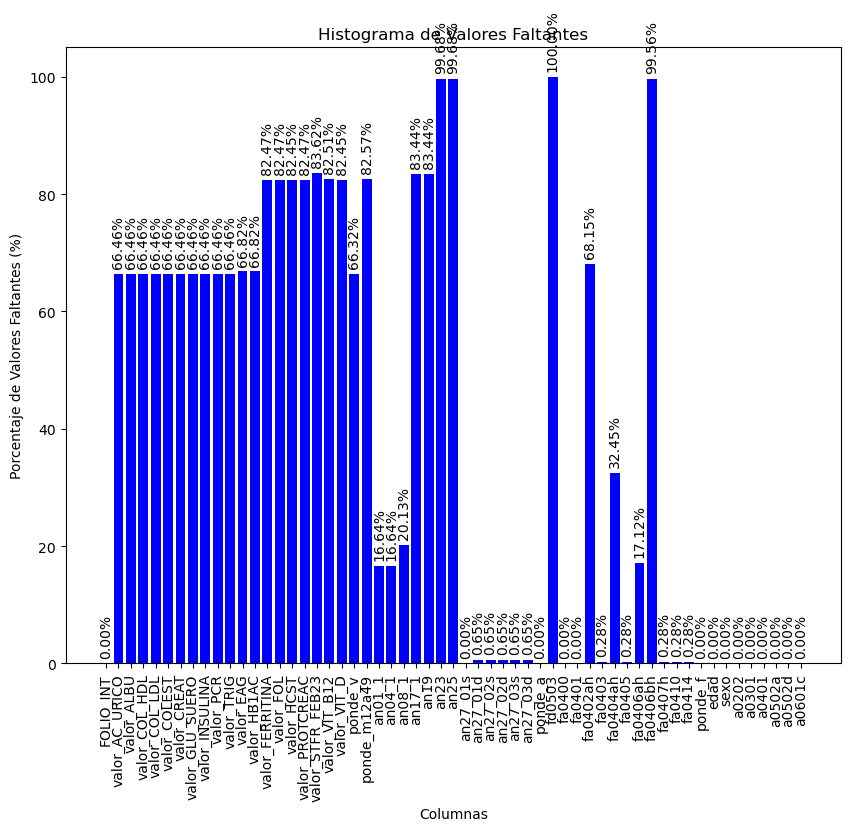

In [34]:
valores_faltantes = df.isnull().sum()

porcentaje_faltantes = (valores_faltantes / len(df)) * 100

fig, ax = plt.subplots(figsize=(10, 8))

rects = ax.bar(valores_faltantes.index, porcentaje_faltantes, color='blue')

ax.set_ylabel('Porcentaje de Valores Faltantes (%)')
ax.set_xlabel('Columnas')
ax.set_title('Histograma de Valores Faltantes')

for rect, label in zip(rects, porcentaje_faltantes):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 1,  
        f'{label:.2f}%',  
        ha='center',
        va='bottom',
        rotation='vertical'  
    )

plt.xticks(rotation=90)

plt.show()

In [35]:
columnas_a_eliminar = ['valor_FERRITINA', 'valor_FOL', 'valor_HCST','valor_PROTCREAC','valor_STFR_FEB23','valor_VIT_B12','valor_VIT_D','ponde_m12a49','an17_1','an19','an23','an25','fd0503','fa0406bh']
df = df.drop(columnas_a_eliminar, axis=1)

In [36]:
columnas_a_eliminar = ['valor_AC_URICO','valor_ALBU','valor_COL_HDL','valor_COL_LDL','valor_COLEST','valor_CREAT','valor_GLU_SUERO','valor_INSULINA','valor_PCR','valor_TRIG','valor_EAG','valor_HB1AC','ponde_v','fa0402ah']
df = df.drop(columnas_a_eliminar, axis=1)

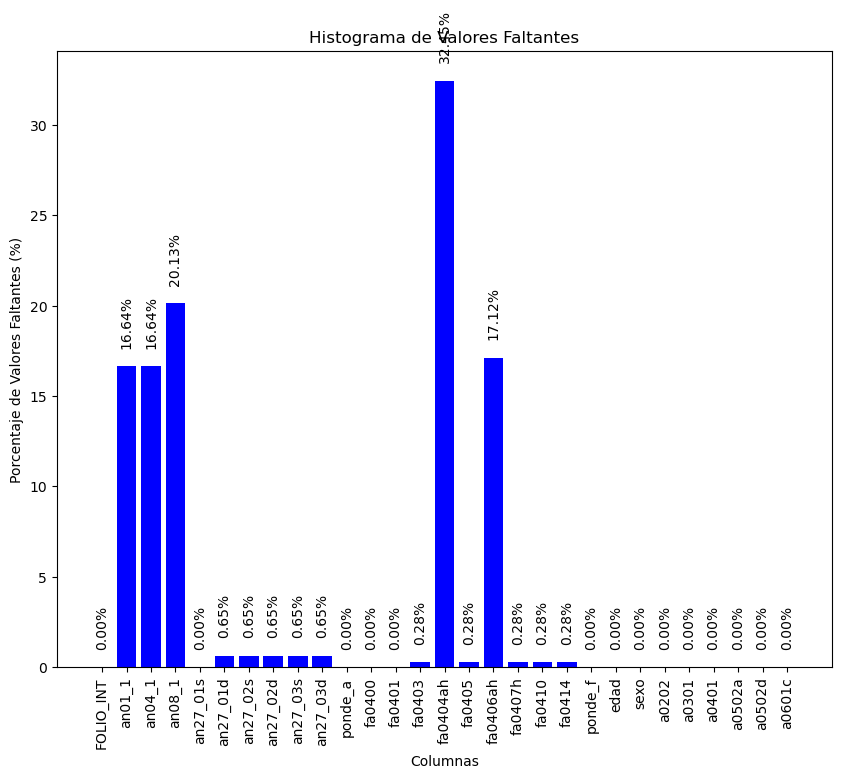

In [37]:
valores_faltantes = df.isnull().sum()

porcentaje_faltantes = (valores_faltantes / len(df)) * 100

fig, ax = plt.subplots(figsize=(10, 8))

rects = ax.bar(valores_faltantes.index, porcentaje_faltantes, color='blue')

ax.set_ylabel('Porcentaje de Valores Faltantes (%)')
ax.set_xlabel('Columnas')
ax.set_title('Histograma de Valores Faltantes')

for rect, label in zip(rects, porcentaje_faltantes):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 1,  
        f'{label:.2f}%',  
        ha='center',
        va='bottom',
        rotation='vertical'  
    )

plt.xticks(rotation=90)
plt.show()

In [38]:
df.isna().sum()

FOLIO_INT       0
an01_1        825
an04_1        825
an08_1        998
an27_01s        0
an27_01d       32
an27_02s       32
an27_02d       32
an27_03s       32
an27_03d       32
ponde_a         0
fa0400          0
fa0401          0
fa0403         14
fa0404ah     1609
fa0405         14
fa0406ah      849
fa0407h        14
fa0410         14
fa0414         14
ponde_f         0
edad            0
sexo            0
a0202           0
a0301           0
a0401           0
a0502a          0
a0502d          0
a0601c          0
dtype: int64

In [39]:
df['fa0414'] = pd.to_numeric(df['fa0414'], errors='coerce')
df['fa0410'] = pd.to_numeric(df['fa0410'], errors='coerce')
df['fa0407h'] = pd.to_numeric(df['fa0407h'], errors='coerce')
df['fa0405'] = pd.to_numeric(df['fa0405'], errors='coerce')
df['fa0403'] = pd.to_numeric(df['fa0403'], errors='coerce')
df['an27_03d'] = pd.to_numeric(df['an27_03d'], errors='coerce')
df['an27_03s'] = pd.to_numeric(df['an27_03s'], errors='coerce')
df['an27_02d'] = pd.to_numeric(df['an27_02d'], errors='coerce')
df['an27_02s'] = pd.to_numeric(df['an27_02s'], errors='coerce')
df['an27_01d'] = pd.to_numeric(df['an27_01d'], errors='coerce')

df['fa0414'].fillna(df['fa0414'].mean(), inplace=True)
df['fa0410'].fillna(df['fa0410'].mean(), inplace=True)
df['fa0407h'].fillna(df['fa0407h'].mean(), inplace=True)
df['fa0405'].fillna(df['fa0405'].mean(), inplace=True)
df['fa0403'].fillna(df['fa0403'].mean(), inplace=True)
df['an27_03d'].fillna(df['an27_03d'].mean(), inplace=True)
df['an27_03s'].fillna(df['an27_03s'].mean(), inplace=True)
df['an27_02d'].fillna(df['an27_02d'].mean(), inplace=True)
df['an27_02s'].fillna(df['an27_02s'].mean(), inplace=True)
df['an27_01d'].fillna(df['an27_01d'].mean(), inplace=True)

In [40]:
df.isna().sum()

FOLIO_INT       0
an01_1        825
an04_1        825
an08_1        998
an27_01s        0
an27_01d        0
an27_02s        0
an27_02d        0
an27_03s        0
an27_03d        0
ponde_a         0
fa0400          0
fa0401          0
fa0403          0
fa0404ah     1609
fa0405          0
fa0406ah      849
fa0407h         0
fa0410          0
fa0414          0
ponde_f         0
edad            0
sexo            0
a0202           0
a0301           0
a0401           0
a0502a          0
a0502d          0
a0601c          0
dtype: int64

In [41]:
df['an01_1']

0       74.55
1         NaN
2         NaN
3          77
4        81.5
        ...  
4953    56.25
4954      NaN
4955      NaN
4956     41.6
4957    69.15
Name: an01_1, Length: 4958, dtype: object

In [42]:
df = df.astype(float)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.impute import KNNImputer

In [44]:
df_known = df.dropna(subset=['an01_1'])
df_unknown = df[df['an01_1'].isnull()]

In [45]:
columns_to_drop = ['an01_1', 'an04_1', 'an08_1', 'fa0404ah', 'fa0406ah']
X = df_known.drop(columns_to_drop, axis=1)
y = df_known['an01_1']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

Mean Squared Error on Test Set: 270.5178398425393


In [49]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [50]:
mse_imputer = mean_squared_error(X_test, X_test_imputed)
print(f'Mean Squared Error of Imputer on Test Set: {mse_imputer}')

Mean Squared Error of Imputer on Test Set: 0.0


In [51]:
df_unknown_imputed = imputer.transform(df_unknown.drop(columns_to_drop, axis=1))

In [52]:
df.loc[df['an01_1'].isnull(), 'an01_1'] = df_unknown_imputed[:, df.columns.get_loc('an01_1')]

In [53]:
df.isna().sum()

FOLIO_INT       0
an01_1          0
an04_1        825
an08_1        998
an27_01s        0
an27_01d        0
an27_02s        0
an27_02d        0
an27_03s        0
an27_03d        0
ponde_a         0
fa0400          0
fa0401          0
fa0403          0
fa0404ah     1609
fa0405          0
fa0406ah      849
fa0407h         0
fa0410          0
fa0414          0
ponde_f         0
edad            0
sexo            0
a0202           0
a0301           0
a0401           0
a0502a          0
a0502d          0
a0601c          0
dtype: int64

In [54]:
df_known = df.dropna(subset=['an04_1'])
df_unknown = df[df['an04_1'].isnull()]

In [55]:
columns_to_drop = ['an04_1', 'an08_1', 'fa0404ah', 'fa0406ah']
X = df_known.drop(columns_to_drop, axis=1)
y = df_known['an04_1']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [58]:
df_unknown_imputed = imputer.transform(df_unknown.drop(columns_to_drop, axis=1))

In [59]:
df.loc[df['an04_1'].isnull(), 'an04_1'] = df_unknown_imputed[:, df.columns.get_loc('an04_1')]

In [60]:
df.isna().sum()

FOLIO_INT       0
an01_1          0
an04_1          0
an08_1        998
an27_01s        0
an27_01d        0
an27_02s        0
an27_02d        0
an27_03s        0
an27_03d        0
ponde_a         0
fa0400          0
fa0401          0
fa0403          0
fa0404ah     1609
fa0405          0
fa0406ah      849
fa0407h         0
fa0410          0
fa0414          0
ponde_f         0
edad            0
sexo            0
a0202           0
a0301           0
a0401           0
a0502a          0
a0502d          0
a0601c          0
dtype: int64

In [61]:
df_known = df.dropna(subset=['an08_1'])
df_unknown = df[df['an08_1'].isnull()]

In [62]:
columns_to_drop = [ 'an08_1', 'fa0404ah', 'fa0406ah']
X = df_known.drop(columns_to_drop, axis=1)
y = df_known['an08_1']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [65]:
df_unknown_imputed = imputer.transform(df_unknown.drop(columns_to_drop, axis=1))

In [66]:
df.loc[df['an08_1'].isnull(), 'an08_1'] = df_unknown_imputed[:, df.columns.get_loc('an08_1')]

In [67]:
df.isna().sum()

FOLIO_INT       0
an01_1          0
an04_1          0
an08_1          0
an27_01s        0
an27_01d        0
an27_02s        0
an27_02d        0
an27_03s        0
an27_03d        0
ponde_a         0
fa0400          0
fa0401          0
fa0403          0
fa0404ah     1609
fa0405          0
fa0406ah      849
fa0407h         0
fa0410          0
fa0414          0
ponde_f         0
edad            0
sexo            0
a0202           0
a0301           0
a0401           0
a0502a          0
a0502d          0
a0601c          0
dtype: int64

In [68]:
df_known = df.dropna(subset=['fa0404ah'])
df_unknown = df[df['fa0404ah'].isnull()]

In [69]:
columns_to_drop = [ 'fa0404ah', 'fa0406ah']
X = df_known.drop(columns_to_drop, axis=1)
y = df_known['fa0404ah']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [72]:
df_unknown_imputed = imputer.transform(df_unknown.drop(columns_to_drop, axis=1))

In [73]:
df.loc[df['fa0404ah'].isnull(), 'fa0404ah'] = df_unknown_imputed[:, df.columns.get_loc('fa0404ah')]

In [74]:
df.isna().sum()

FOLIO_INT      0
an01_1         0
an04_1         0
an08_1         0
an27_01s       0
an27_01d       0
an27_02s       0
an27_02d       0
an27_03s       0
an27_03d       0
ponde_a        0
fa0400         0
fa0401         0
fa0403         0
fa0404ah       0
fa0405         0
fa0406ah     849
fa0407h        0
fa0410         0
fa0414         0
ponde_f        0
edad           0
sexo           0
a0202          0
a0301          0
a0401          0
a0502a         0
a0502d         0
a0601c         0
dtype: int64

In [75]:
df_known = df.dropna(subset=['fa0406ah'])
df_unknown = df[df['fa0406ah'].isnull()]

In [76]:
columns_to_drop = [ 'fa0406ah']
X = df_known.drop(columns_to_drop, axis=1)
y = df_known['fa0406ah']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [79]:
df_unknown_imputed = imputer.transform(df_unknown.drop(columns_to_drop, axis=1))

In [80]:
df.loc[df['fa0406ah'].isnull(), 'fa0406ah'] = df_unknown_imputed[:, df.columns.get_loc('fa0406ah')]

In [81]:
df.isna().sum()

FOLIO_INT    0
an01_1       0
an04_1       0
an08_1       0
an27_01s     0
an27_01d     0
an27_02s     0
an27_02d     0
an27_03s     0
an27_03d     0
ponde_a      0
fa0400       0
fa0401       0
fa0403       0
fa0404ah     0
fa0405       0
fa0406ah     0
fa0407h      0
fa0410       0
fa0414       0
ponde_f      0
edad         0
sexo         0
a0202        0
a0301        0
a0401        0
a0502a       0
a0502d       0
a0601c       0
dtype: int64

#### Correlación y Fusión de los datos

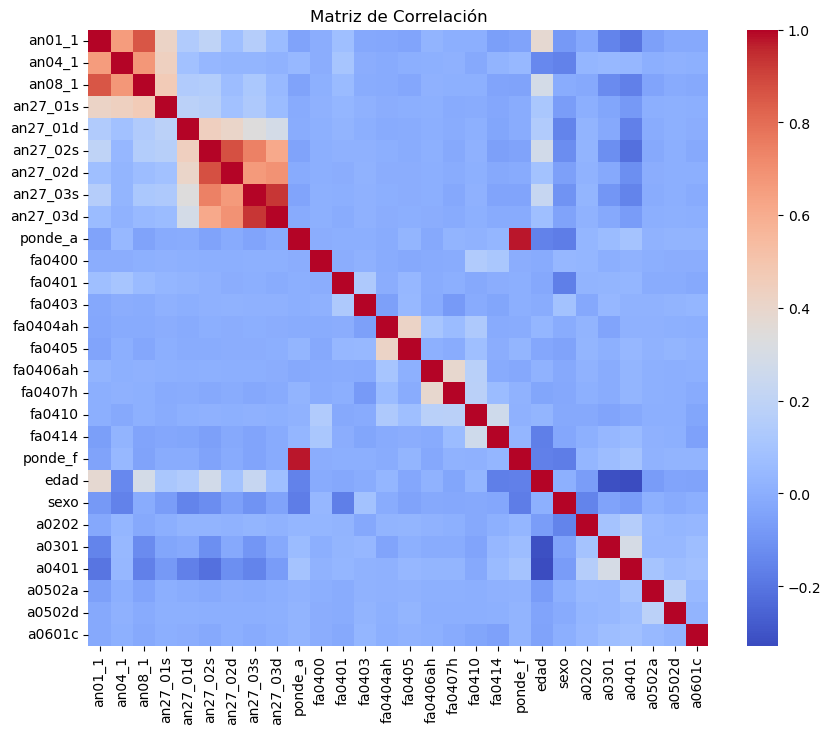

In [82]:
dfcorrel = df.copy()
dfcorrel.drop('FOLIO_INT', axis=1, inplace=True)

correlation_matrix = dfcorrel.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

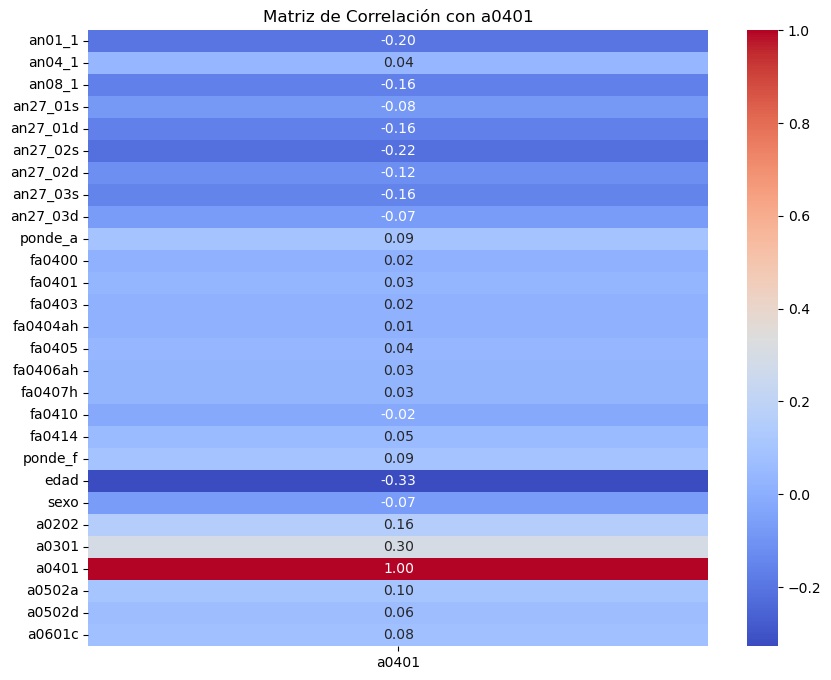

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(correlation_matrix['a0401']), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de Correlación con a0401')
plt.show()


<div class="alert alert-block alert-info">
<b>Variables seleccionadas:</b>
    <ol>
        <li>edad</li>
        <li>a0301</li>
        <li>an01_1</li>
        <li>an08_1</li>
        <li>an27_02s</li>
        <li>a0202</li>
        <li>an27_01d</li>
        <li>an27_03s</li>
    </ol>
    
</div>



#### EDA

In [84]:
dff = df[['edad','a0301','an27_02s','an01_1','an08_1','a0202','an27_01d','an27_03s','a0401']].copy()

In [85]:
nombres_nuevos = {'a0301': 'DIABETES', 'an27_02s': 'SISTOLICA2','an01_1': 'PESO','an08_1': 'CINTURA','a0202': 'DEPRESION','an27_01d': 'DIASTOLICA1','an27_03s': 'SISTOLICA3','a0401': 'HIPERTENSION'}
dff.rename(columns=nombres_nuevos, inplace=True)

In [86]:
dff

,edad,DIABETES,SISTOLICA2,PESO,CINTURA,DEPRESION,DIASTOLICA1,SISTOLICA3,HIPERTENSION
0,41.0,3.0,100.0,74.55,107.0,1.0,78.0,101.0,3.0
1,65.0,3.0,88.0,104.00,104.0,1.0,63.0,97.0,3.0
2,68.0,3.0,109.0,105.00,105.0,1.0,61.0,109.0,1.0
3,35.0,3.0,91.0,77.00,105.6,2.0,67.0,96.0,3.0
4,35.0,3.0,113.0,81.50,98.5,1.0,67.0,111.0,3.0
...,...,...,...,...,...,...,...,...,...
4953,39.0,3.0,119.0,56.25,80.0,2.0,83.0,115.0,3.0
4954,69.0,3.0,143.0,147.00,147.0,2.0,87.0,144.0,1.0
4955,67.0,3.0,97.0,108.00,108.0,2.0,59.0,100.0,3.0
4956,31.0,3.0,89.0,41.60,67.2,2.0,52.0,88.0,3.0


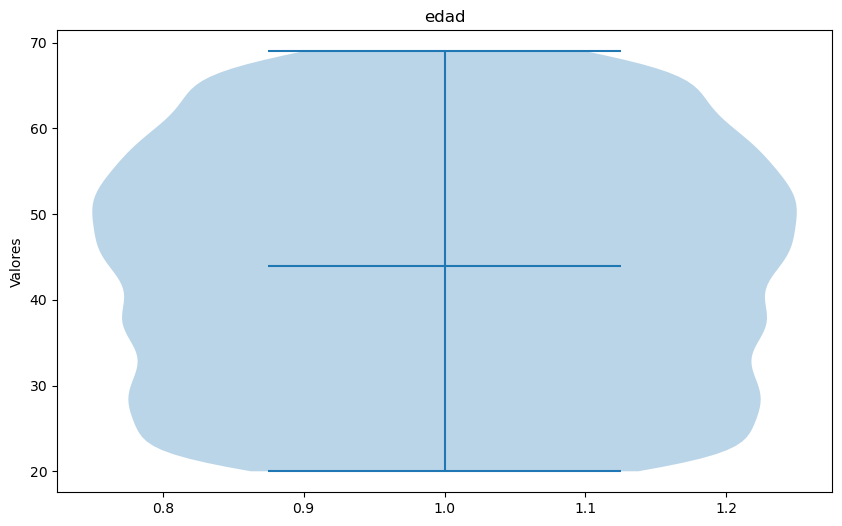

In [87]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=df['edad'], showmeans=False, showmedians=True)

plt.title(f'edad')
plt.ylabel('Valores')

plt.show()

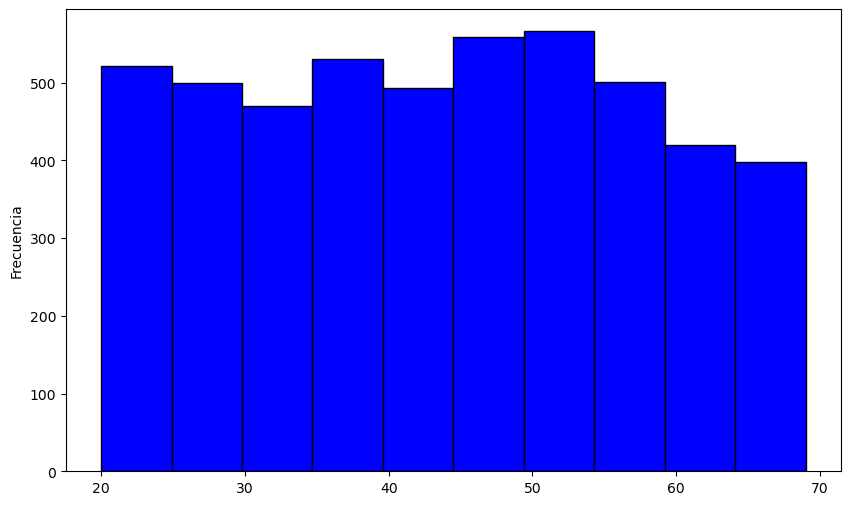

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(df['edad'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

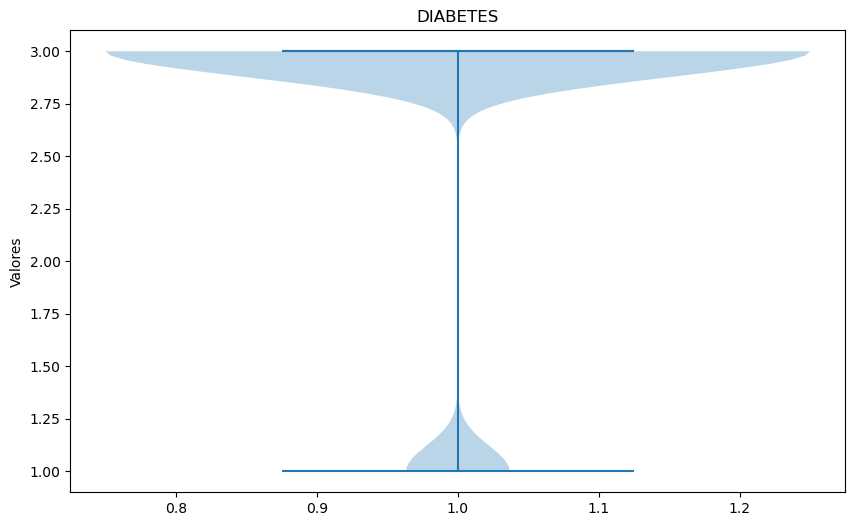

In [91]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['DIABETES'], showmeans=False, showmedians=True)

plt.title(f'DIABETES')
plt.ylabel('Valores')

plt.show()

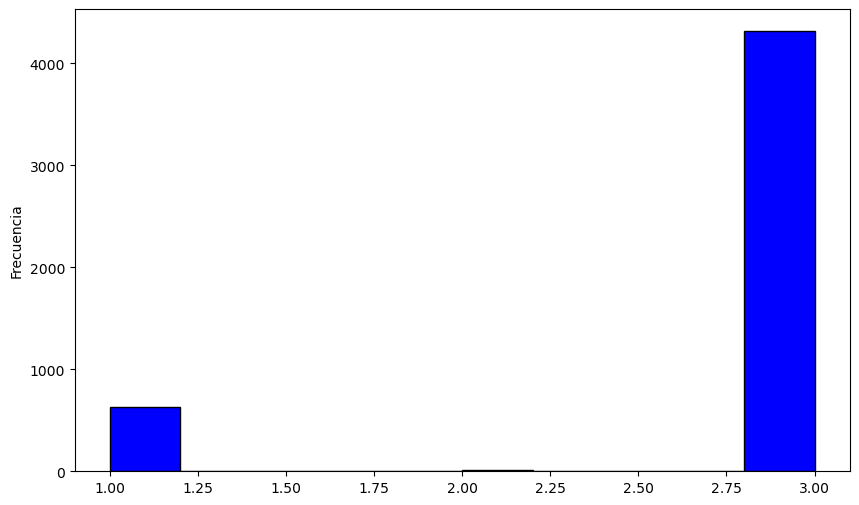

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(dff['DIABETES'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

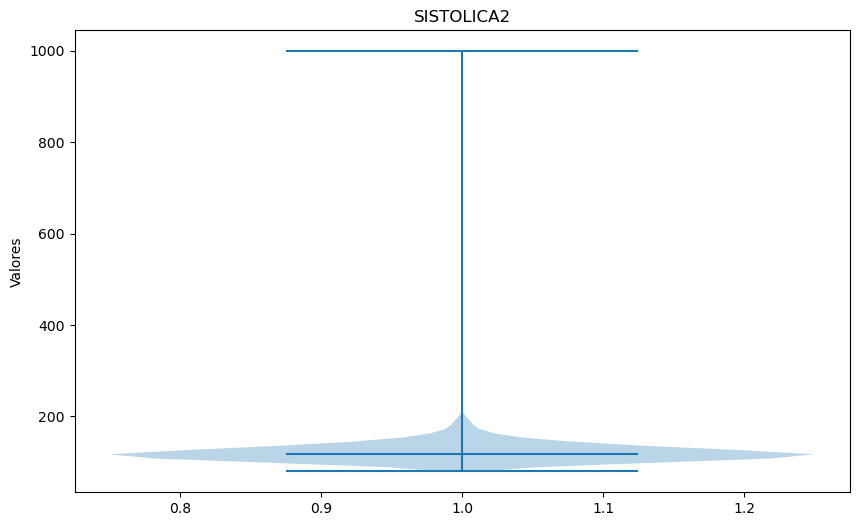

In [93]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['SISTOLICA2'], showmeans=False, showmedians=True)

plt.title(f'SISTOLICA2')
plt.ylabel('Valores')

plt.show()

In [94]:
q1 = dff['SISTOLICA2'].quantile(0.25)
q3 = dff['SISTOLICA2'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [95]:
valores_atipicos=dff[(dff['SISTOLICA2']>u_s)|(dff['SISTOLICA2']<u_i)]
print(valores_atipicos)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
55    47.0       3.0       188.0   57.20     84.9        2.0         99.0   
135   47.0       3.0       176.0   91.80    106.8        2.0        106.0   
141   67.0       1.0       182.0  180.00    180.0        2.0         57.0   
153   64.0       1.0       999.0  132.00    132.0        2.0         65.0   
155   47.0       3.0       180.0   62.60     90.6        2.0        110.0   
...    ...       ...         ...     ...      ...        ...          ...   
4879  49.0       3.0       200.0   77.65     92.3        1.0        133.0   
4890  66.0       3.0       186.0  188.00    188.0        2.0         97.0   
4934  67.0       3.0       181.0  189.00    189.0        2.0         97.0   
4944  60.0       3.0       189.0  193.00    193.0        2.0         89.0   
4950  61.0       1.0       177.0  185.00    185.0        2.0         69.0   

      SISTOLICA3  HIPERTENSION  
55         177.0           3.0  
135      

In [96]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos {cantidad_atipicos}')

Numeros de valores atipicos 141


In [97]:
dff = dff.drop(valores_atipicos.index).reset_index(drop=True)
print(dff)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
0     41.0       3.0       100.0   74.55    107.0        1.0         78.0   
1     65.0       3.0        88.0  104.00    104.0        1.0         63.0   
2     68.0       3.0       109.0  105.00    105.0        1.0         61.0   
3     35.0       3.0        91.0   77.00    105.6        2.0         67.0   
4     35.0       3.0       113.0   81.50     98.5        1.0         67.0   
...    ...       ...         ...     ...      ...        ...          ...   
4812  39.0       3.0       119.0   56.25     80.0        2.0         83.0   
4813  69.0       3.0       143.0  147.00    147.0        2.0         87.0   
4814  67.0       3.0        97.0  108.00    108.0        2.0         59.0   
4815  31.0       3.0        89.0   41.60     67.2        2.0         52.0   
4816  56.0       1.0        98.0   69.15     98.0        2.0         58.0   

      SISTOLICA3  HIPERTENSION  
0          101.0           3.0  
1        

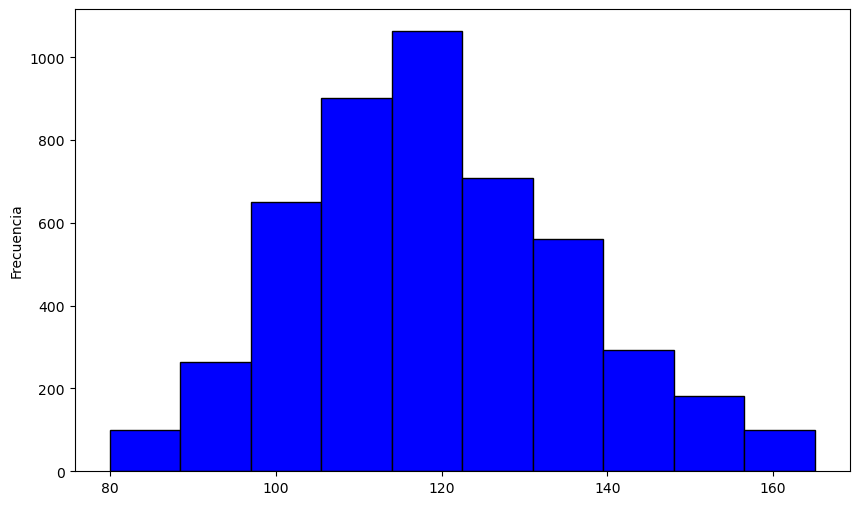

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(dff['SISTOLICA2'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

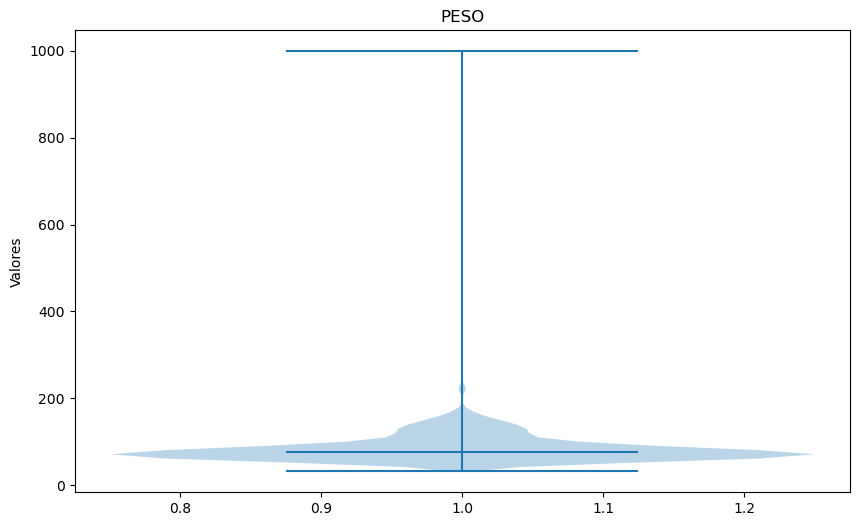

In [99]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['PESO'], showmeans=False, showmedians=True)

plt.title(f'PESO')
plt.ylabel('Valores')

plt.show()

In [100]:
q1 = dff['PESO'].quantile(0.25)
q3 = dff['PESO'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [101]:
valores_atipicos=dff[(dff['PESO']>u_s)|(dff['PESO']<u_i)]
print(valores_atipicos)

      edad  DIABETES  SISTOLICA2   PESO  CINTURA  DEPRESION  DIASTOLICA1  \
24    60.0       3.0       142.0  140.0    140.0        2.0         82.0   
34    63.0       3.0       144.0  142.0    142.0        1.0         72.0   
39    60.0       3.0       130.0  138.0    138.0        2.0         88.0   
84    61.0       3.0       151.0  153.0    153.0        2.0         82.0   
158   64.0       3.0       146.0  152.0    152.0        2.0         74.0   
...    ...       ...         ...    ...      ...        ...          ...   
4691  60.0       1.0       145.0  151.0    151.0        2.0         82.0   
4697  68.0       3.0       165.0  173.0    173.0        2.0        107.0   
4760  61.0       3.0       154.0  163.0    163.0        2.0         98.0   
4773  63.0       1.0       146.0  143.0    143.0        2.0         84.0   
4813  69.0       3.0       143.0  147.0    147.0        2.0         87.0   

      SISTOLICA3  HIPERTENSION  
24         127.0           1.0  
34         147.0     

In [102]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos {cantidad_atipicos}')

Numeros de valores atipicos 325


In [103]:
dff = dff.drop(valores_atipicos.index).reset_index(drop=True)
print(dff)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
0     41.0       3.0       100.0   74.55    107.0        1.0         78.0   
1     65.0       3.0        88.0  104.00    104.0        1.0         63.0   
2     68.0       3.0       109.0  105.00    105.0        1.0         61.0   
3     35.0       3.0        91.0   77.00    105.6        2.0         67.0   
4     35.0       3.0       113.0   81.50     98.5        1.0         67.0   
...    ...       ...         ...     ...      ...        ...          ...   
4487  62.0       3.0       106.0  125.00    125.0        1.0         68.0   
4488  39.0       3.0       119.0   56.25     80.0        2.0         83.0   
4489  67.0       3.0        97.0  108.00    108.0        2.0         59.0   
4490  31.0       3.0        89.0   41.60     67.2        2.0         52.0   
4491  56.0       1.0        98.0   69.15     98.0        2.0         58.0   

      SISTOLICA3  HIPERTENSION  
0          101.0           3.0  
1        

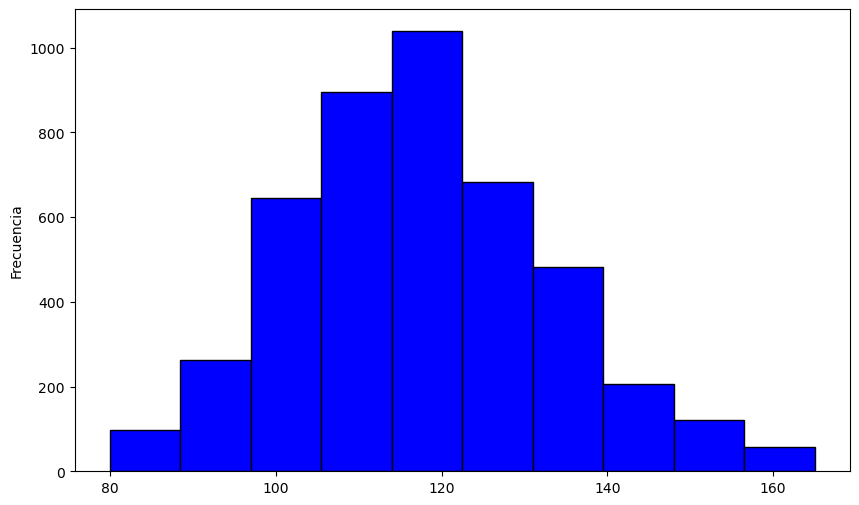

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(dff['SISTOLICA2'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

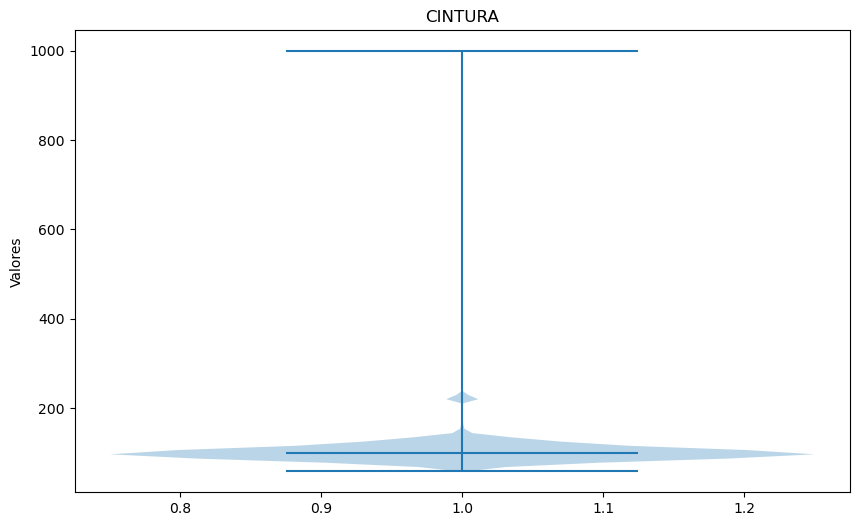

In [105]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['CINTURA'], showmeans=False, showmedians=True)

plt.title(f'CINTURA')
plt.ylabel('Valores')

plt.show()

In [106]:
q1 = dff['CINTURA'].quantile(0.25)
q3 = dff['CINTURA'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [107]:
valores_atipicos=dff[(dff['CINTURA']>u_s)|(dff['CINTURA']<u_i)]
print(valores_atipicos)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
28    52.0       3.0       118.0   77.60    222.2        2.0         69.0   
86    53.0       1.0       132.0   77.15    222.2        1.0         80.0   
87    20.0       3.0       109.0   77.60    222.2        2.0         73.0   
117   53.0       3.0       111.0   55.90    222.2        2.0         81.0   
188   58.0       3.0       147.0   72.83    222.2        2.0         90.0   
...    ...       ...         ...     ...      ...        ...          ...   
4215  57.0       3.0       164.0   48.57    222.2        2.0         93.0   
4221  30.0       3.0       118.0   75.05    222.2        2.0         68.0   
4254  56.0       1.0       123.0   66.60    222.2        2.0         73.0   
4258  48.0       3.0       121.0  102.00    222.2        2.0         80.0   
4376  36.0       3.0        98.0   77.05    149.8        2.0         68.0   

      SISTOLICA3  HIPERTENSION  
28         128.0           3.0  
86       

In [108]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos {cantidad_atipicos}')

Numeros de valores atipicos 101


In [109]:
dff = dff.drop(valores_atipicos.index).reset_index(drop=True)
print(dff)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
0     41.0       3.0       100.0   74.55    107.0        1.0         78.0   
1     65.0       3.0        88.0  104.00    104.0        1.0         63.0   
2     68.0       3.0       109.0  105.00    105.0        1.0         61.0   
3     35.0       3.0        91.0   77.00    105.6        2.0         67.0   
4     35.0       3.0       113.0   81.50     98.5        1.0         67.0   
...    ...       ...         ...     ...      ...        ...          ...   
4386  62.0       3.0       106.0  125.00    125.0        1.0         68.0   
4387  39.0       3.0       119.0   56.25     80.0        2.0         83.0   
4388  67.0       3.0        97.0  108.00    108.0        2.0         59.0   
4389  31.0       3.0        89.0   41.60     67.2        2.0         52.0   
4390  56.0       1.0        98.0   69.15     98.0        2.0         58.0   

      SISTOLICA3  HIPERTENSION  
0          101.0           3.0  
1        

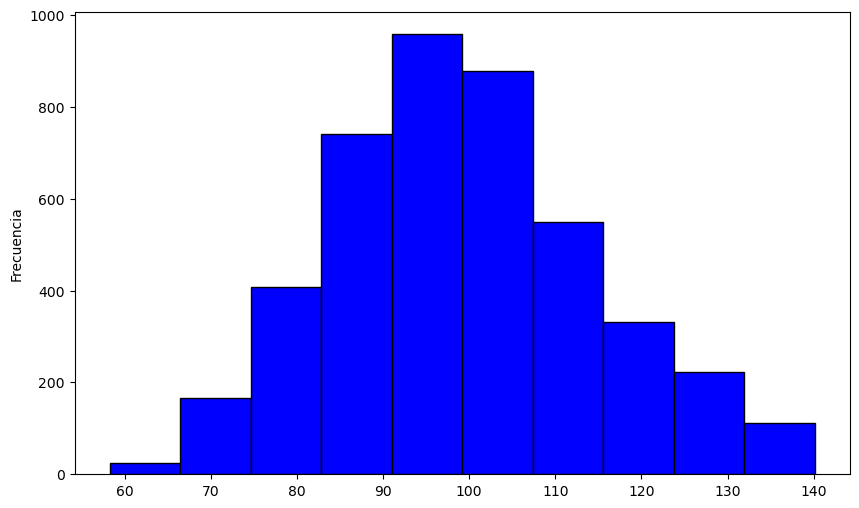

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(dff['CINTURA'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

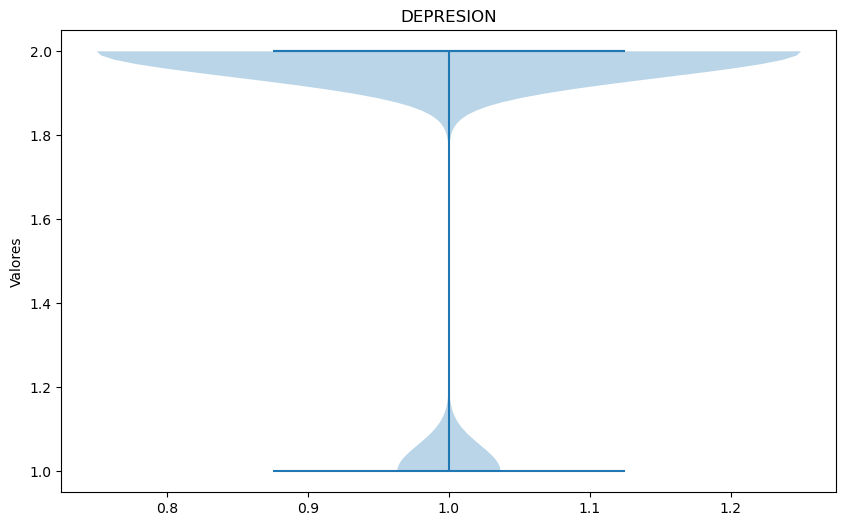

In [111]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['DEPRESION'], showmeans=False, showmedians=True)

plt.title(f'DEPRESION')
plt.ylabel('Valores')

plt.show()

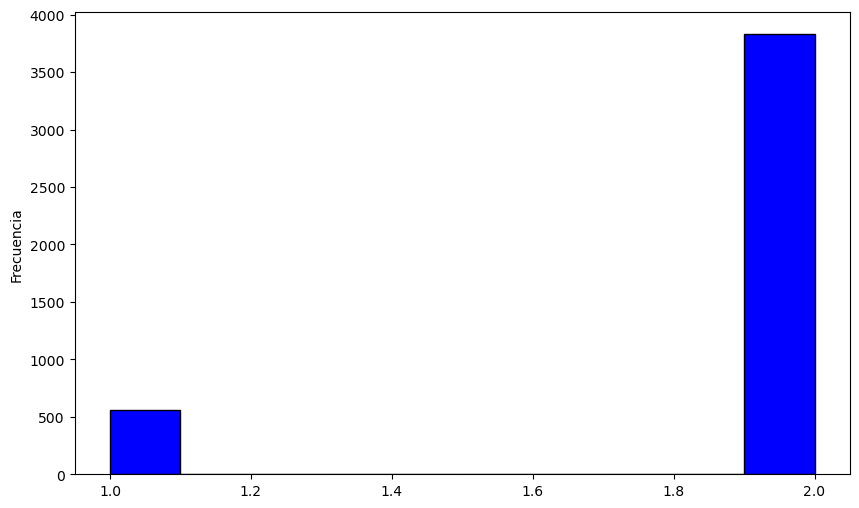

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(dff['DEPRESION'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

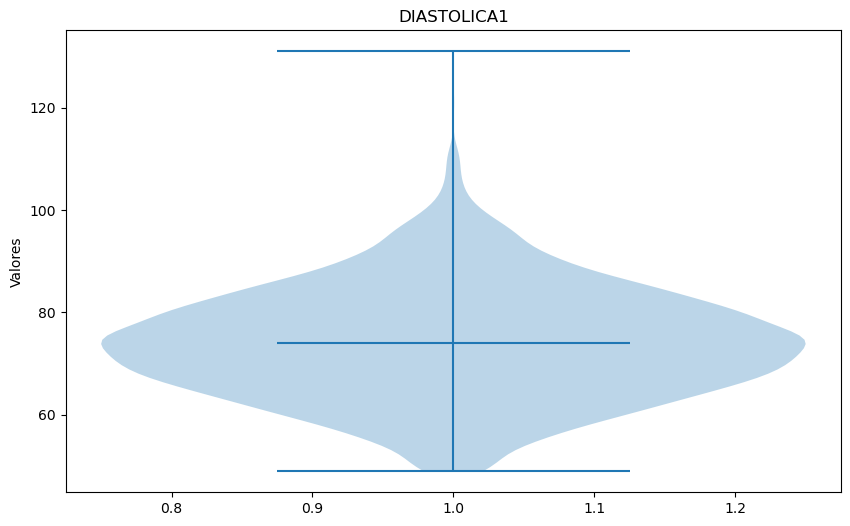

In [113]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['DIASTOLICA1'], showmeans=False, showmedians=True)

plt.title(f'DIASTOLICA1')
plt.ylabel('Valores')

plt.show()

In [114]:
q1 = dff['DIASTOLICA1'].quantile(0.25)
q3 = dff['DIASTOLICA1'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [115]:
valores_atipicos=dff[(dff['DIASTOLICA1']>u_s)|(dff['DIASTOLICA1']<u_i)]
print(valores_atipicos)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
336   49.0       3.0       155.0   72.15     84.2        2.0        108.0   
424   41.0       1.0       145.0  102.60    121.8        2.0        105.0   
726   41.0       3.0       139.0   91.38    108.0        2.0        110.0   
859   25.0       3.0       156.0   91.60    108.7        2.0        109.0   
926   35.0       3.0       139.0   87.50     97.5        2.0        104.0   
1058  50.0       3.0       138.0  120.50    124.5        2.0        131.0   
1345  46.0       1.0       156.0   59.90     94.8        1.0        105.0   
1520  20.0       3.0       116.0   57.70     82.5        2.0        109.0   
1594  44.0       3.0       149.0   78.40     97.4        2.0        106.0   
1604  35.0       3.0       141.0   86.90    106.9        2.0        105.0   
1793  38.0       3.0       153.0   91.95    113.4        2.0        109.0   
1884  46.0       3.0       148.0   68.90    100.2        2.0        111.0   

In [116]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos {cantidad_atipicos}')

Numeros de valores atipicos 33


In [117]:
dff = dff.drop(valores_atipicos.index).reset_index(drop=True)
print(dff)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
0     41.0       3.0       100.0   74.55    107.0        1.0         78.0   
1     65.0       3.0        88.0  104.00    104.0        1.0         63.0   
2     68.0       3.0       109.0  105.00    105.0        1.0         61.0   
3     35.0       3.0        91.0   77.00    105.6        2.0         67.0   
4     35.0       3.0       113.0   81.50     98.5        1.0         67.0   
...    ...       ...         ...     ...      ...        ...          ...   
4353  62.0       3.0       106.0  125.00    125.0        1.0         68.0   
4354  39.0       3.0       119.0   56.25     80.0        2.0         83.0   
4355  67.0       3.0        97.0  108.00    108.0        2.0         59.0   
4356  31.0       3.0        89.0   41.60     67.2        2.0         52.0   
4357  56.0       1.0        98.0   69.15     98.0        2.0         58.0   

      SISTOLICA3  HIPERTENSION  
0          101.0           3.0  
1        

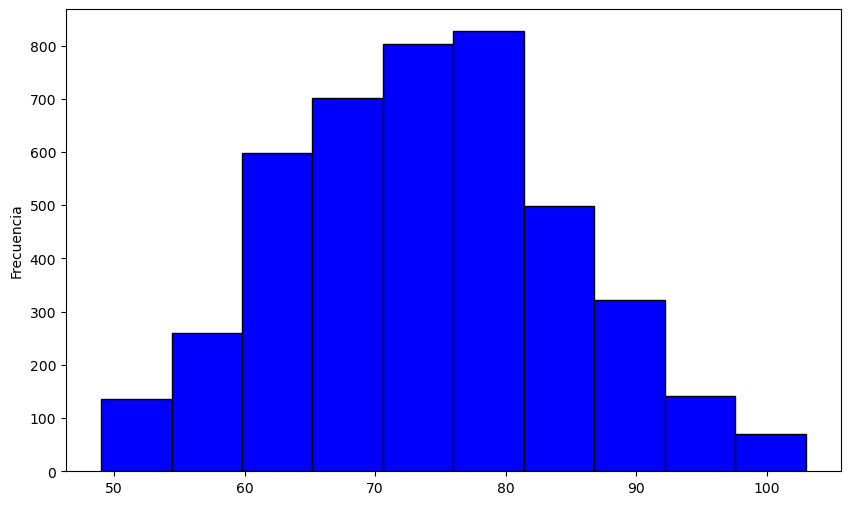

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(dff['DIASTOLICA1'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

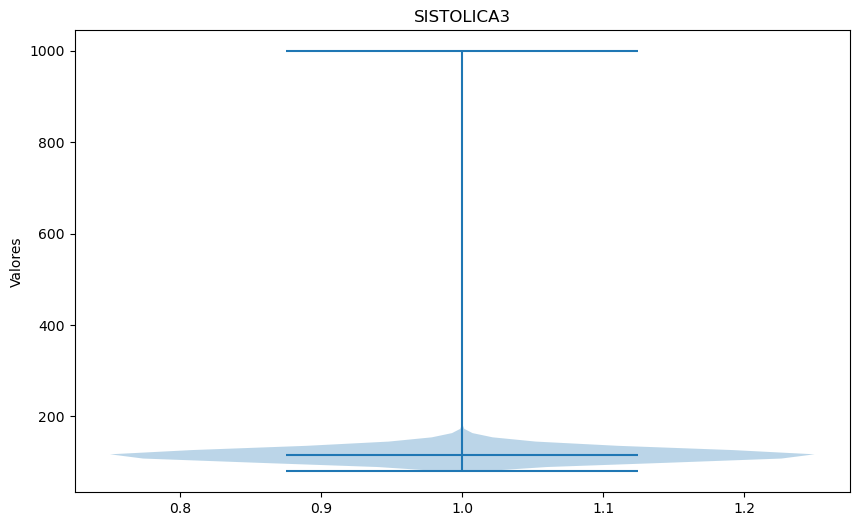

In [119]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['SISTOLICA3'], showmeans=False, showmedians=True)

plt.title(f'SISTOLICA3')
plt.ylabel('Valores')

plt.show()

In [120]:
q1 = dff['SISTOLICA3'].quantile(0.25)
q3 = dff['SISTOLICA3'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [121]:
valores_atipicos=dff[(dff['SISTOLICA3']>u_s)|(dff['SISTOLICA3']<u_i)]
print(valores_atipicos)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
90    52.0       3.0       159.0   71.70    102.3        2.0         91.0   
349   44.0       3.0       142.0  111.10    125.8        2.0         85.0   
393   42.0       1.0       152.0   93.90    110.2        2.0         83.0   
402   51.0       3.0       157.0   86.75    118.8        2.0         96.0   
535   68.0       3.0       108.0  104.00    104.0        2.0         79.0   
664   59.0       3.0       159.0   73.45     98.3        2.0         88.0   
952   51.0       3.0       147.0  127.60    131.8        1.0        100.0   
1182  59.0       3.0       161.0   74.55    106.1        2.0        100.0   
1423  41.0       3.0       146.0  112.45    137.2        2.0         99.0   
1460  46.0       3.0       160.0   92.50    116.7        2.0        102.0   
1480  56.0       3.0       157.0  106.85    126.7        2.0         97.0   
1481  50.0       3.0       157.0   84.00    105.3        1.0         86.0   

In [122]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos {cantidad_atipicos}')

Numeros de valores atipicos 48


In [123]:
dff = dff.drop(valores_atipicos.index).reset_index(drop=True)
print(dff)

      edad  DIABETES  SISTOLICA2    PESO  CINTURA  DEPRESION  DIASTOLICA1  \
0     41.0       3.0       100.0   74.55    107.0        1.0         78.0   
1     65.0       3.0        88.0  104.00    104.0        1.0         63.0   
2     68.0       3.0       109.0  105.00    105.0        1.0         61.0   
3     35.0       3.0        91.0   77.00    105.6        2.0         67.0   
4     35.0       3.0       113.0   81.50     98.5        1.0         67.0   
...    ...       ...         ...     ...      ...        ...          ...   
4305  62.0       3.0       106.0  125.00    125.0        1.0         68.0   
4306  39.0       3.0       119.0   56.25     80.0        2.0         83.0   
4307  67.0       3.0        97.0  108.00    108.0        2.0         59.0   
4308  31.0       3.0        89.0   41.60     67.2        2.0         52.0   
4309  56.0       1.0        98.0   69.15     98.0        2.0         58.0   

      SISTOLICA3  HIPERTENSION  
0          101.0           3.0  
1        

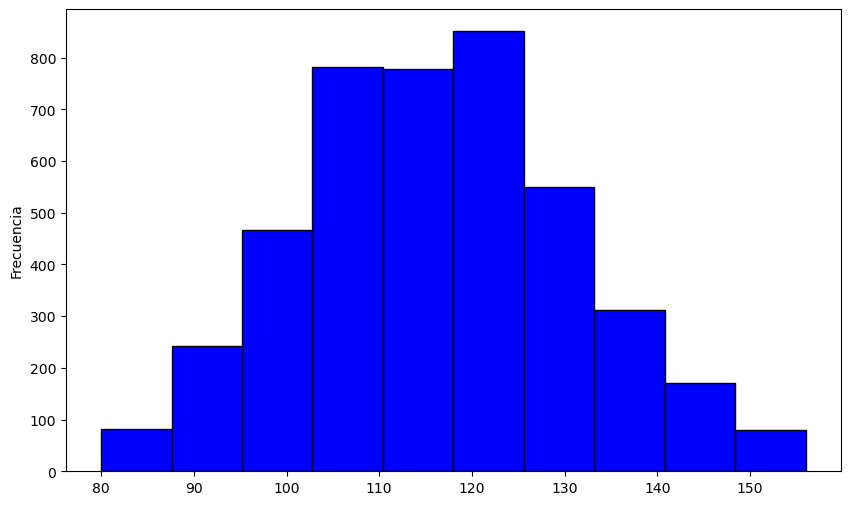

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(dff['SISTOLICA3'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

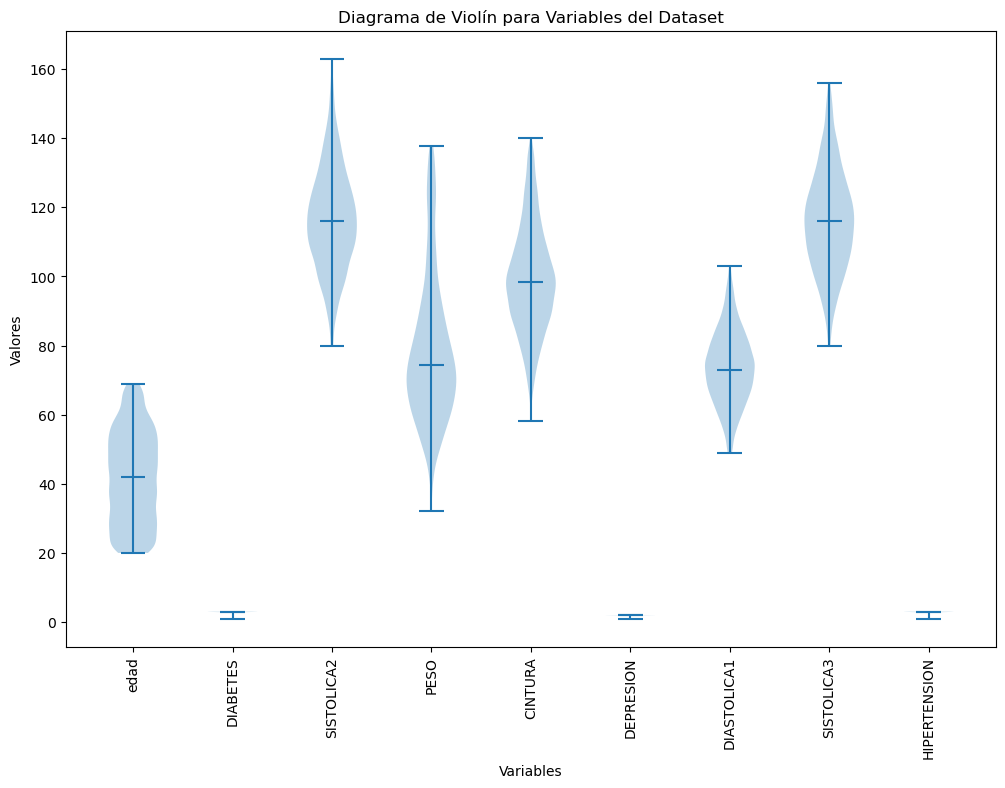

In [125]:
plt.figure(figsize=(12, 8))
ax = plt.violinplot(dataset=dff.values, showmeans=False, showmedians=True)

plt.xticks(ticks=range(1, len(dff.columns) + 1), labels=dff.columns, rotation=90)

plt.title('Diagrama de Violín para Variables del Dataset')
plt.xlabel('Variables')
plt.ylabel('Valores')

plt.show()

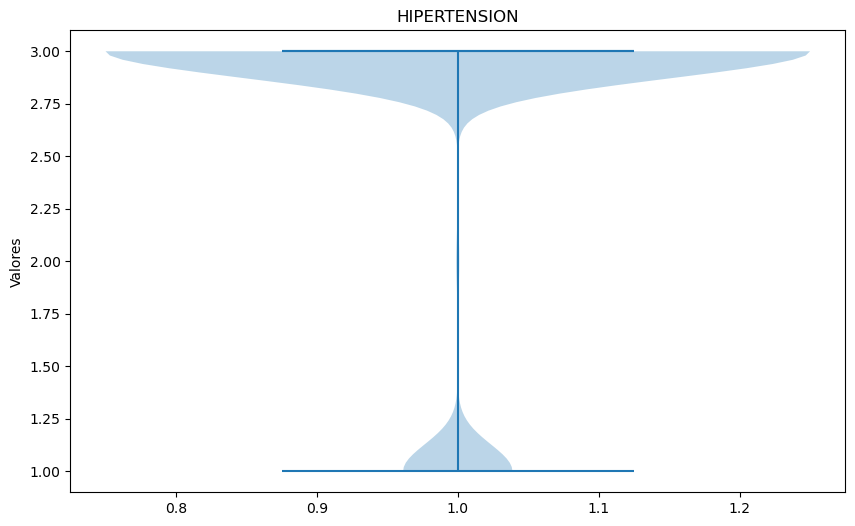

In [126]:
plt.figure(figsize=(10, 6))
plt.violinplot(dataset=dff['HIPERTENSION'], showmeans=False, showmedians=True)

plt.title(f'HIPERTENSION')
plt.ylabel('Valores')

plt.show()

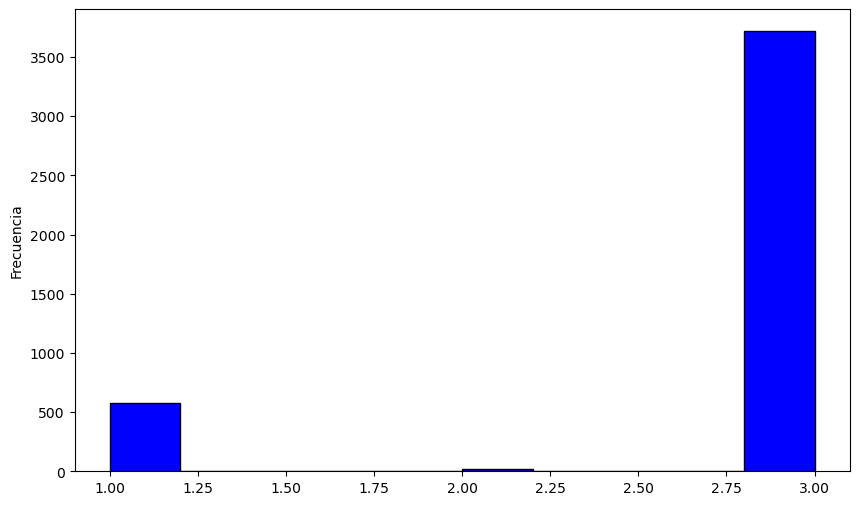

In [127]:
plt.figure(figsize=(10, 6))
plt.hist(dff['HIPERTENSION'], color='blue', edgecolor='black')

plt.ylabel('Frecuencia')

plt.show()

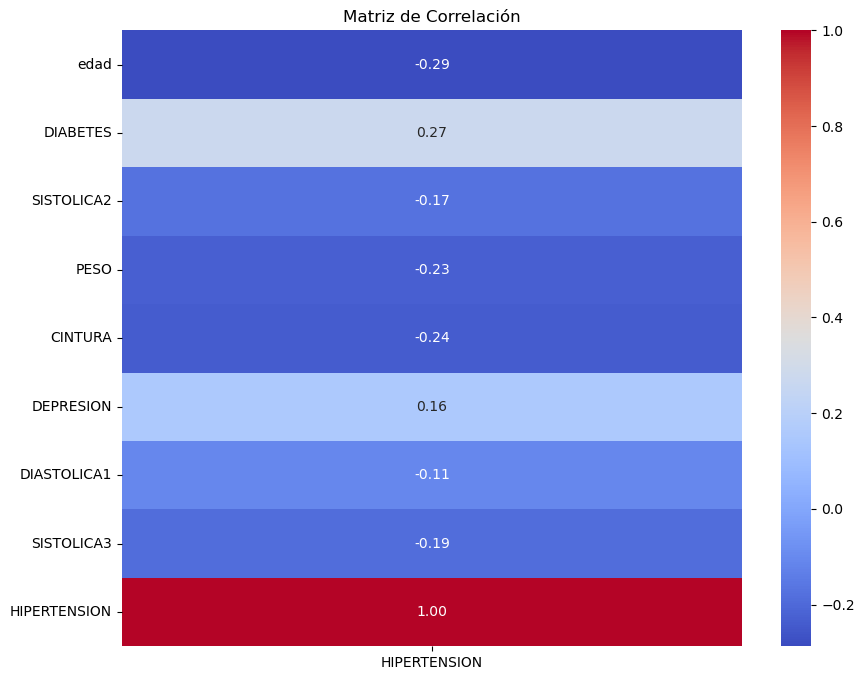

In [128]:
dfcorrel = dff.copy()

correlation_matrix = dfcorrel.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(correlation_matrix['HIPERTENSION']), cmap='coolwarm', fmt='.2f',annot=True)
plt.title('Matriz de Correlación')
plt.show()

### Modelado

#### Agrupación con KMeans.

In [129]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [133]:
columnas_clustering = ['edad', 'DIABETES', 'PESO','CINTURA','SISTOLICA3','HIPERTENSION','DIASTOLICA1','SISTOLICA2','DEPRESION']

In [134]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dff[columnas_clustering])

/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

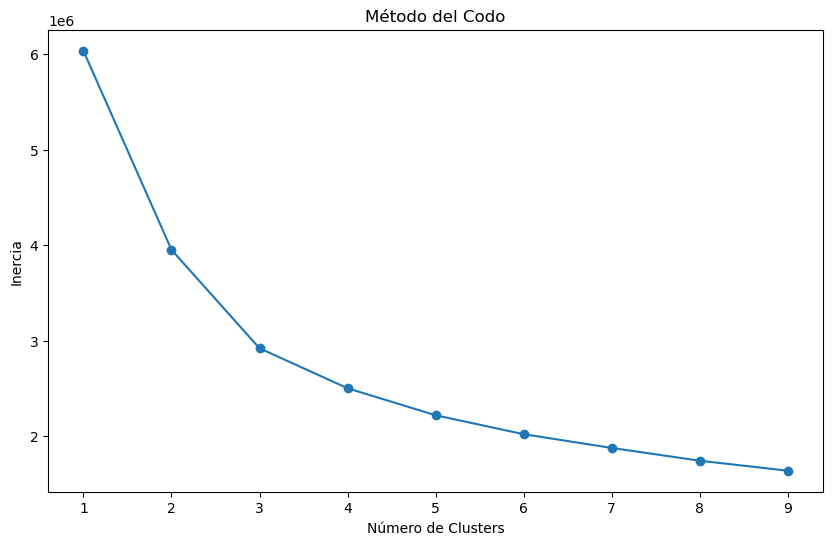

In [229]:
inercia = []
rango_clusters = range(1, 10)

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dff)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(rango_clusters, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [173]:
num_clusters = 3

In [174]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [175]:
kmeans.fit(df_scaled)

/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [176]:
dff['cluster'] = kmeans.labels_

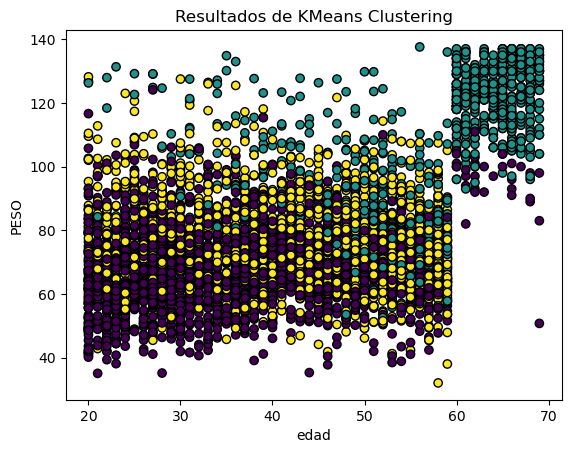

In [177]:
plt.scatter(dff['edad'], dff['PESO'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('edad')
plt.ylabel('PESO')
plt.show()

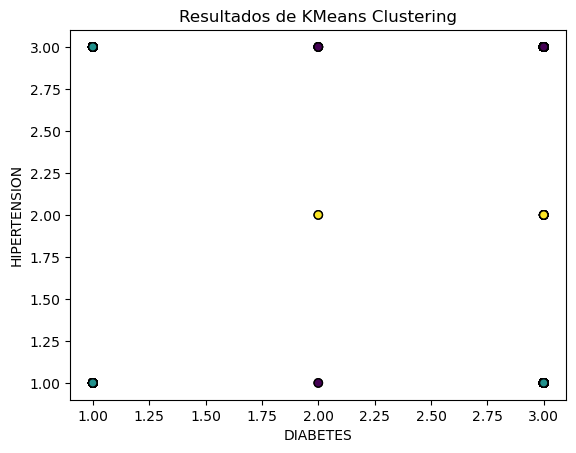

In [178]:
plt.scatter(dff['DIABETES'], dff['HIPERTENSION'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('DIABETES')
plt.ylabel('HIPERTENSION')
plt.show()

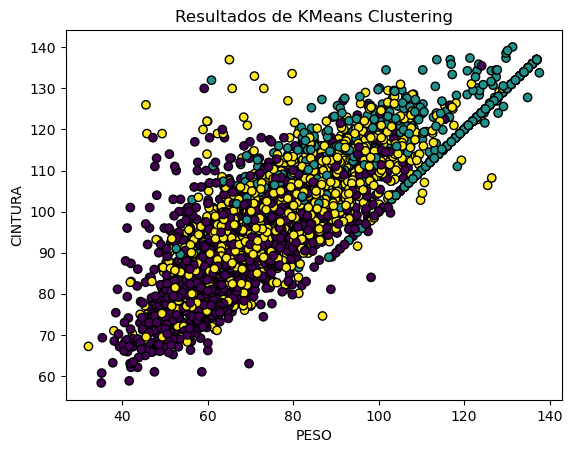

In [179]:
plt.scatter(dff['PESO'], dff['CINTURA'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('PESO')
plt.ylabel('CINTURA')
plt.show()

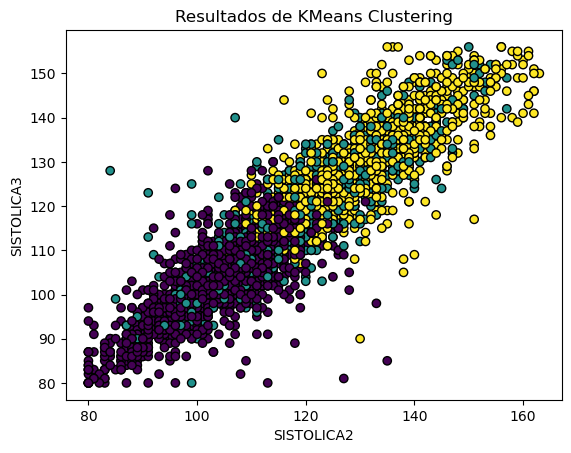

In [180]:
plt.scatter(dff['SISTOLICA2'], dff['SISTOLICA3'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('SISTOLICA2')
plt.ylabel('SISTOLICA3')
plt.show()

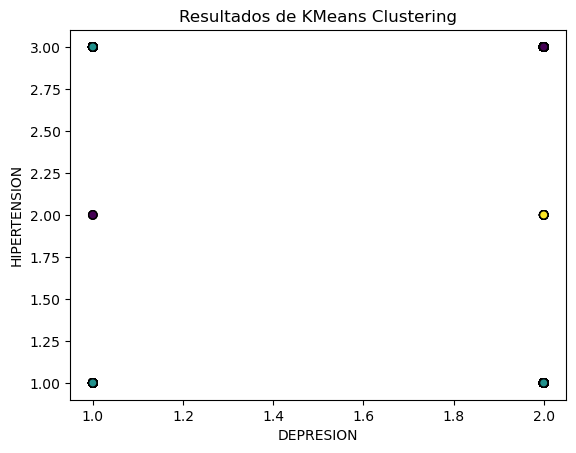

In [181]:
plt.scatter(dff['DEPRESION'], dff['HIPERTENSION'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('DEPRESION')
plt.ylabel('HIPERTENSION')
plt.show()

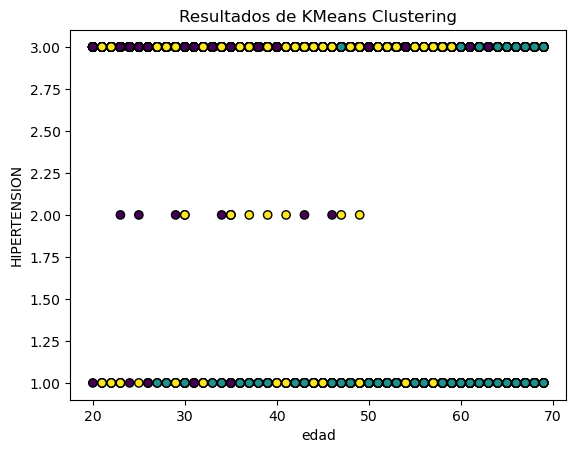

In [182]:
plt.scatter(dff['edad'], dff['HIPERTENSION'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('edad')
plt.ylabel('HIPERTENSION')
plt.show()

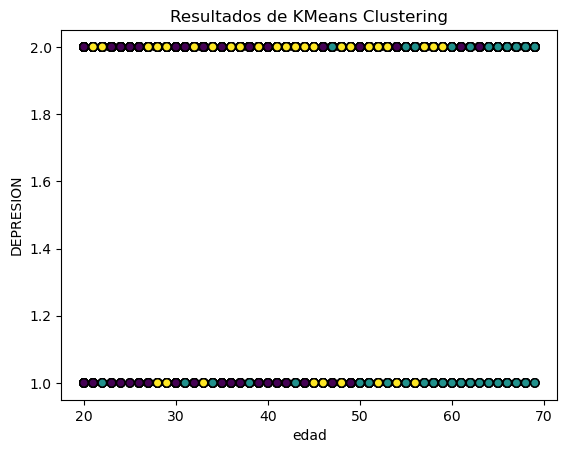

In [183]:
plt.scatter(dff['edad'], dff['DEPRESION'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('edad')
plt.ylabel('DEPRESION')
plt.show()

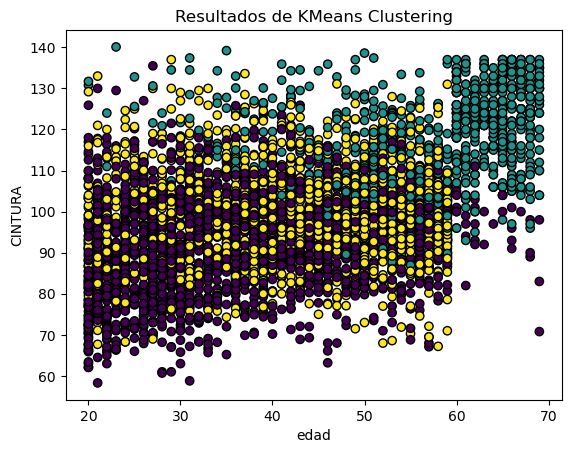

In [184]:
plt.scatter(dff['edad'], dff['CINTURA'], c=dff['cluster'], cmap='viridis', edgecolors='k')
plt.title('Resultados de KMeans Clustering')
plt.xlabel('edad')
plt.ylabel('CINTURA')
plt.show()

#### Desarrollo del Modelo Predictivo

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [186]:
columnas_x = ['edad', 'DIABETES', 'PESO','CINTURA','SISTOLICA3','DIASTOLICA1','SISTOLICA2','DEPRESION']

In [187]:
columna_y = 'HIPERTENSION'

In [188]:
X_train, X_test, y_train, y_test = train_test_split(dff[columnas_x], dff[columna_y], test_size=0.2, random_state=42)

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
modelo_logistico = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

In [193]:
modelo_logistico.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [222]:
predicciones = modelo_logistico.predict(X_test_scaled)
probabilidades = modelo_logistico.decision_function(X_test_scaled)

### Evaluación 

In [202]:
accuracy = accuracy_score(y_test, predicciones)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.85


In [203]:
error_rate = 1 - accuracy
print(f"Tasa de Error: {error_rate:.2f}")

Tasa de Error: 0.15


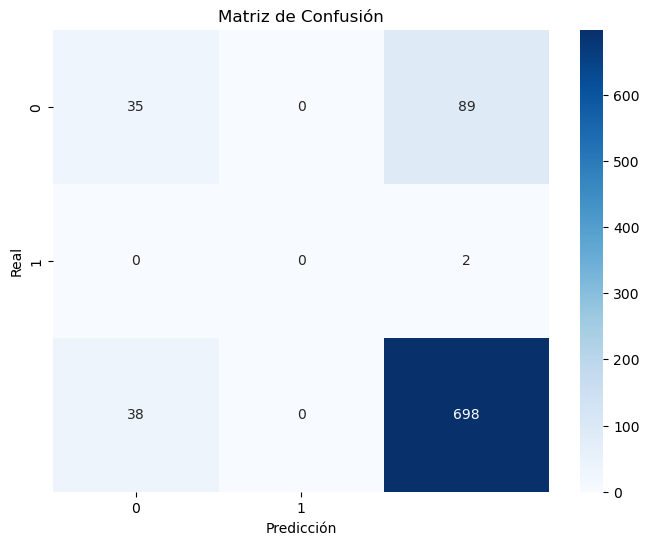

In [205]:
conf_matrix = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [206]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         1.0       0.48      0.28      0.36       124
         2.0       0.00      0.00      0.00         2
         3.0       0.88      0.95      0.92       736

    accuracy                           0.85       862
   macro avg       0.45      0.41      0.42       862
weighted avg       0.82      0.85      0.83       862



/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/medina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
from sklearn.preprocessing import label_binarize

In [223]:
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

In [224]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [227]:
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probabilidades.ravel())
roc_auc = auc(fpr, tpr)

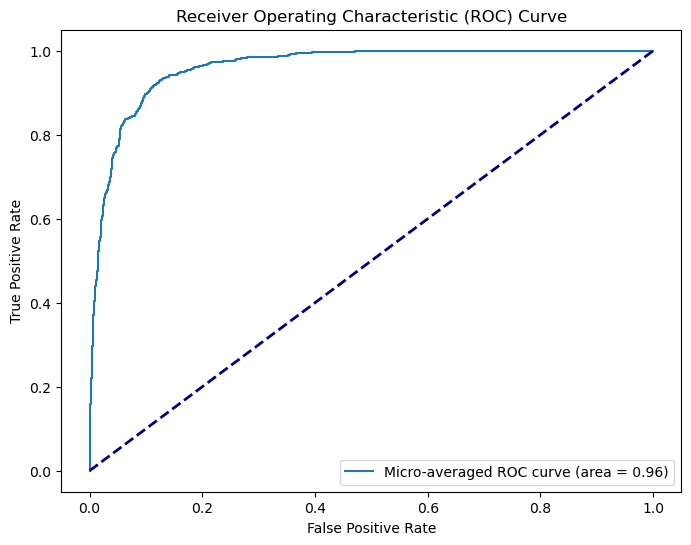

In [228]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Micro-averaged ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()